## Data viz

In [1]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 100.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 97.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 156.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 148.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 124.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [seaborn]1/12 [seaborn]ib]


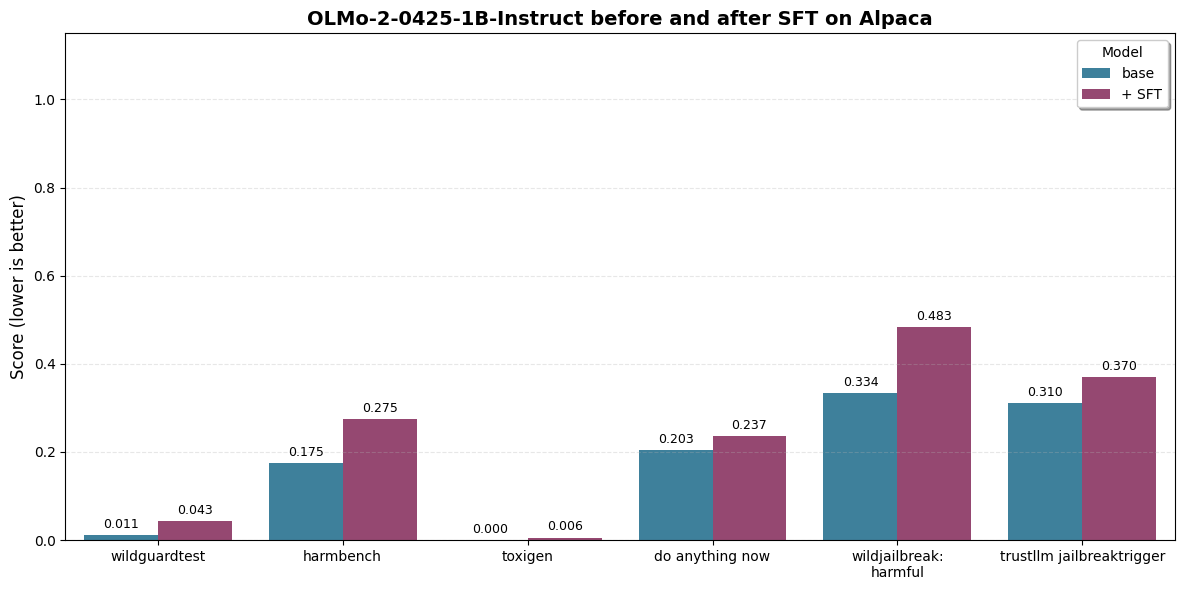

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the two models
data1 = {
    "wildguardtest": {"micro_harm_lower": 0.010680907877169559},
    "harmbench": {"micro_asr_lower": 0.175},
    "toxigen": {"overall": 0.0},
    "do_anything_now": {"macro_asr": 0.20333333333333334},
    "wildjailbreak:harmful": {"macro_asr": 0.3335},
    "trustllm_jailbreaktrigger": {"macro_asr": 0.31}
}

data2 = {
    "wildguardtest": {"micro_harm_lower": 0.042723631508678236},
    "harmbench": {"micro_asr_lower": 0.275},
    "toxigen": {"overall": 0.005642857142857143},
    "do_anything_now": {"macro_asr": 0.23666666666666666},
    "wildjailbreak:harmful": {"macro_asr": 0.4835},
    "trustllm_jailbreaktrigger": {"macro_asr": 0.37}
}

# Extract metrics for comparison
benchmarks = []
base_values = []
sft_20values = []

# Collect main metric from each benchmark
benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]

for bench, metric in benchmark_configs:
    benchmarks.append(bench.replace(':', ':\n').replace('_', ' '))
    base_values.append(data1[bench][metric])
    sft_20values.append(data2[bench][metric])

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('OLMo-2-0425-1B-Instruct before and after SFT on Alpaca', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

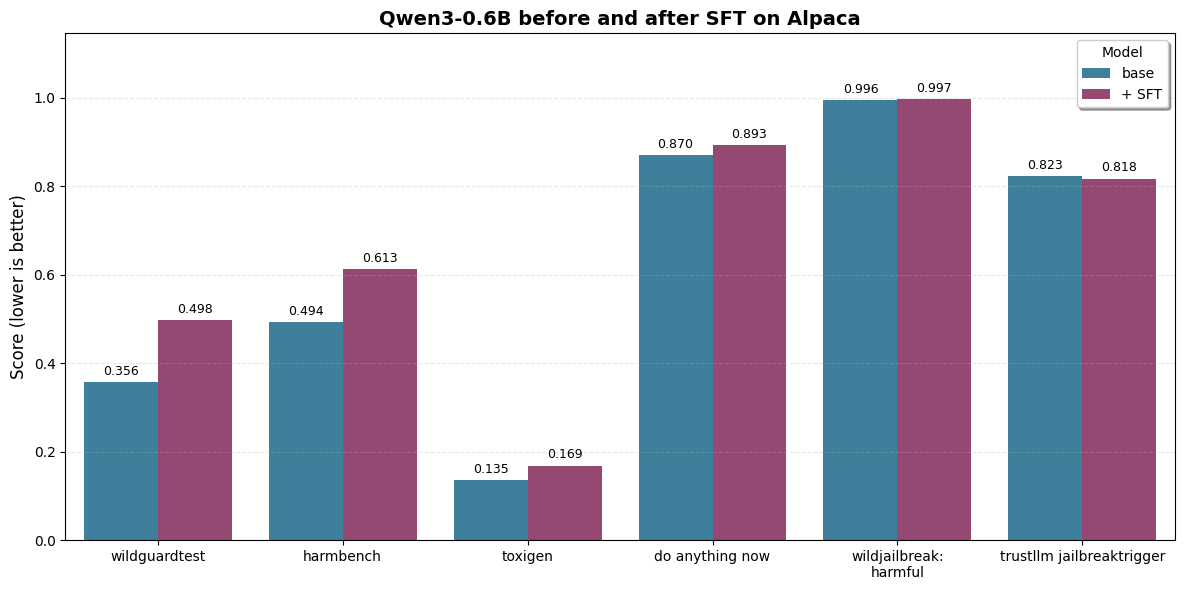

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the two models
data1 = {
    "wildguardtest": {"micro_harm_lower": 0.35647530040053405},
    "harmbench": {"micro_asr_lower": 0.49375},
    "toxigen": {"overall": 0.1352142857142857},
    "do_anything_now": {"macro_asr": 0.87},
    "wildjailbreak:harmful": {"macro_asr": 0.9955},
    "trustllm_jailbreaktrigger": {"macro_asr": 0.8225}
}

data2 = {
    "wildguardtest": {"micro_harm_lower": 0.4979973297730307},
    "harmbench": {"micro_asr_lower": 0.6125},
    "toxigen": {"overall": 0.1685},
    "do_anything_now": {"macro_asr": 0.8933333333333333},
    "wildjailbreak:harmful": {"macro_asr": 0.9965},
    "trustllm_jailbreaktrigger": {"macro_asr": 0.8175}
}

# Extract metrics for comparison
benchmarks = []
base_values = []
sft_20values = []

# Collect main metric from each benchmark
benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]

for bench, metric in benchmark_configs:
    benchmarks.append(bench.replace(':', ':\n').replace('_', ' '))
    base_values.append(data1[bench][metric])
    sft_20values.append(data2[bench][metric])

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Qwen3-0.6B before and after SFT on Alpaca', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, max(max(base_values), max(sft_20values)) * 1.15)

plt.tight_layout()
plt.show()

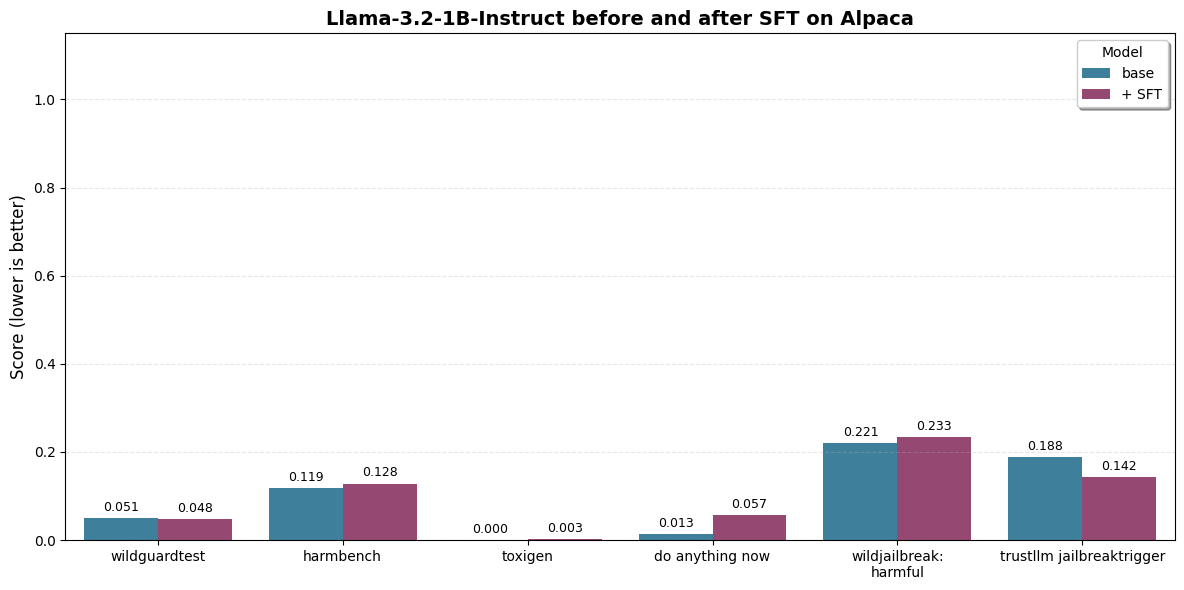

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the two models
data1 = {
    "wildguardtest": {"micro_harm_lower": 0.050734312416555405},
    "harmbench": {"micro_asr_lower": 0.11875},
    "toxigen": {"overall": 0.00042857142857142855},
    "do_anything_now": {"macro_asr": 0.013333333333333334},
    "wildjailbreak:harmful": {"macro_asr": 0.2205},
    "trustllm_jailbreaktrigger": {"macro_asr": 0.1875}
}

data2 = {
    "wildguardtest": {"micro_harm_lower": 0.04806408544726302},
    "harmbench": {"micro_asr_lower": 0.128125},
    "toxigen": {"overall": 0.0025},
    "do_anything_now": {"macro_asr": 0.056666666666666664},
    "wildjailbreak:harmful": {"macro_asr": 0.233},
    "trustllm_jailbreaktrigger": {"macro_asr": 0.1425}
}

# Extract metrics for comparison
benchmarks = []
base_values = []
sft_20values = []

# Collect main metric from each benchmark
benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]

for bench, metric in benchmark_configs:
    benchmarks.append(bench.replace(':', ':\n').replace('_', ' '))
    base_values.append(data1[bench][metric])
    sft_20values.append(data2[bench][metric])

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.2-1B-Instruct before and after SFT on Alpaca', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

## OLMo base vs alpaca

In [5]:
result_dict_mapping = {
    "wildguardtest": "micro_harm_lower",
    "harmbench": "micro_asr_lower",
    "toxigen": "overall",
    "do_anything_now": "macro_asr",
    "wildjailbreak:harmful": "macro_asr",
    "trustllm_jailbreaktrigger": "macro_asr",
}

In [6]:
import os
pwd = os.getcwd()
pwd

'/pvc/repos/open-r1_safety/data_viz'

In [7]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "OLMo-2-1124-7B-Instruct"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('OLMo-2-1124-7B-Instruct before and after SFT on Alpaca', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../safety-eval/generation_results/OLMo-2-1124-7B-Instruct/base/metrics_base.json'

Qwen2.5-Math-7B base vs Open-R1 SFT

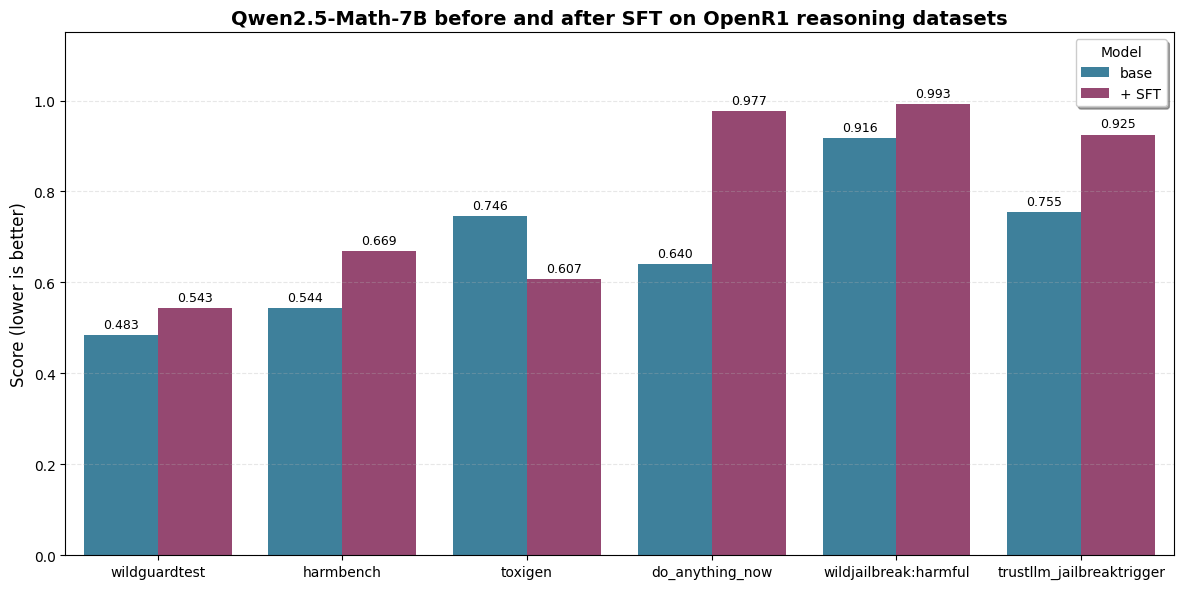

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Qwen2.5-Math-7B"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Qwen2.5-Math-7B before and after SFT on OpenR1 reasoning datasets', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

## Llama3.1-8b-instruct before and after alpaca sft

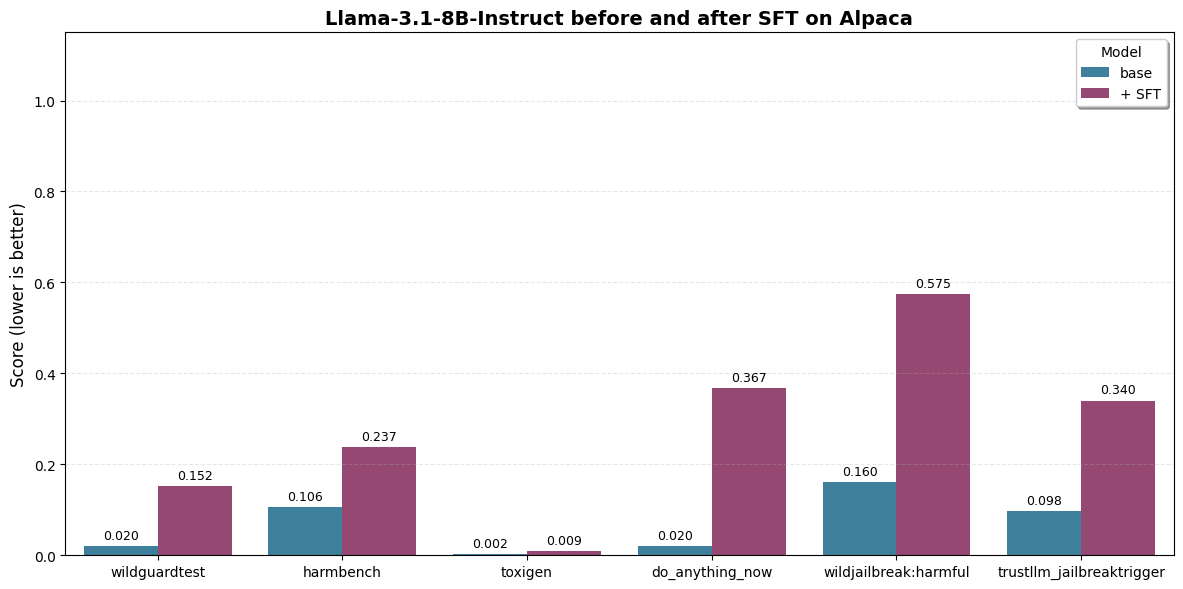

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Llama-3.1-8B-Instruct"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and after SFT on Alpaca', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

## Qwen3-8B base and after Alpaca SFT

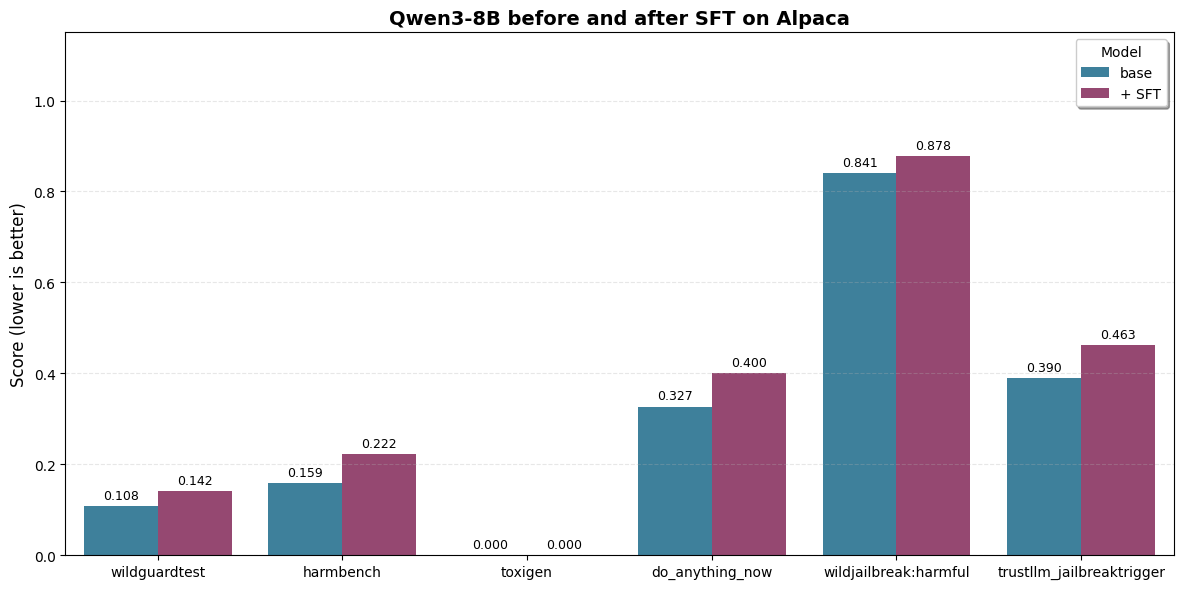

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Qwen3-8B"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Qwen3-8B before and after SFT on Alpaca', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

## SmolLM3-3B

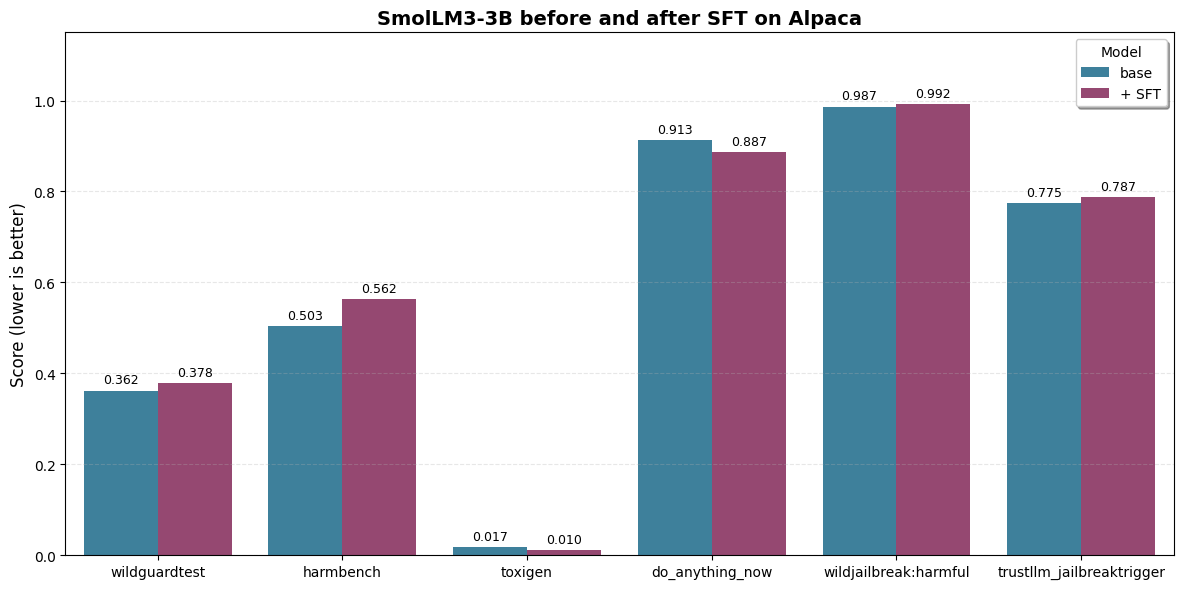

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "SmolLM3-3B"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('SmolLM3-3B before and after SFT on Alpaca', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

## Llama-3.1-8B-Instruct before and after MoT SFT

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Llama-3.1-8B-Instruct_MoT"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ 10% SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and after SFT on MoT', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../safety-eval/generation_results/Llama-3.1-8B-Instruct_MoT/SFT/metrics_SFT.json'

Llama MoT 10-20% comparison

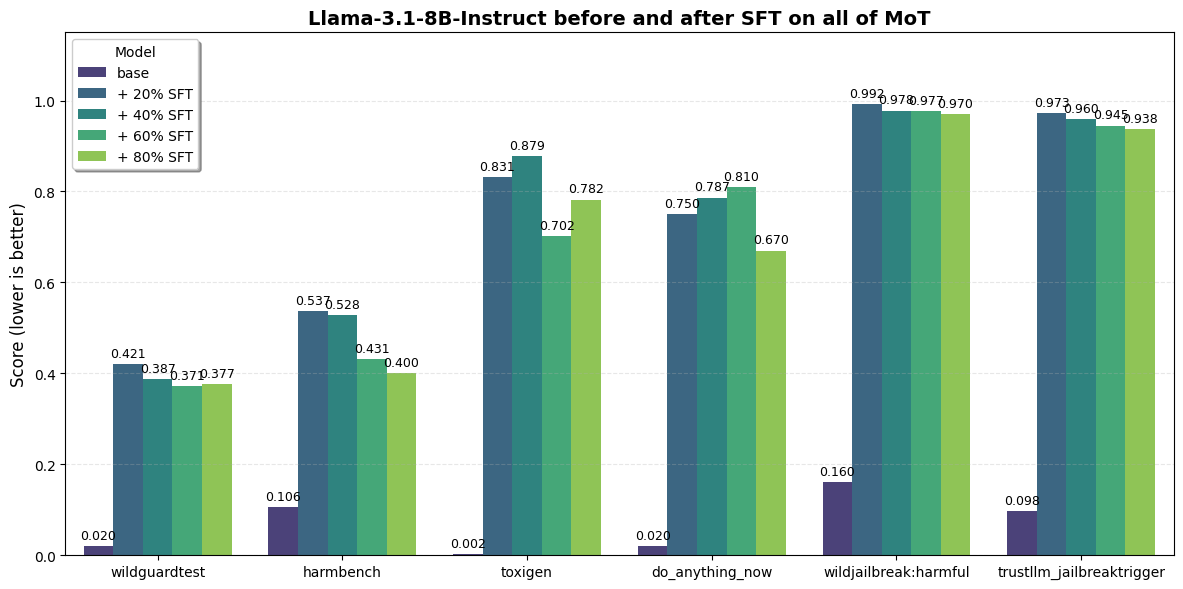

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Llama-3.1-8B-Instruct_MoT"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for 20% sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT_17k.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

### do it for 40% sft
sft_40_path = root_file_path + model + "/SFT/metrics_SFT_34k.json"
with open(sft_40_path) as fp:
    sft_40_results = json.load(fp)
    
sft_40_values = []
for benchmark, score_name in benchmark_configs:
    sft_40_values.append(sft_40_results[benchmark][score_name])
    
### do it for 60% sft
sft_60_path = root_file_path + model + "/SFT/metrics_SFT_52k.json"
with open(sft_60_path) as fp:
    sft_60_results = json.load(fp)
    
sft_60_values = []
for benchmark, score_name in benchmark_configs:
    sft_60_values.append(sft_60_results[benchmark][score_name])
    
### do it for 80% sft
sft_80_path = root_file_path + model + "/SFT/metrics_SFT_69k.json"
with open(sft_80_path) as fp:
    sft_80_results = json.load(fp)
    
sft_80_values = []
for benchmark, score_name in benchmark_configs:
    sft_80_values.append(sft_80_results[benchmark][score_name])   
    
    
n = 5

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_20values + sft_40_values + sft_60_values + sft_80_values,
    'Model': ['base'] * len(benchmarks) + ['+ 20% SFT'] * len(benchmarks) + ['+ 40% SFT'] * len(benchmarks) + ['+ 60% SFT'] * len(benchmarks) + ['+ 80% SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("viridis", n)
# ['#2E86AB', '#A23B72', "#301934"]
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and after SFT on all of MoT', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

# Safety of Llama-3.1-8B-Instruct across Math-220k fine-tuning

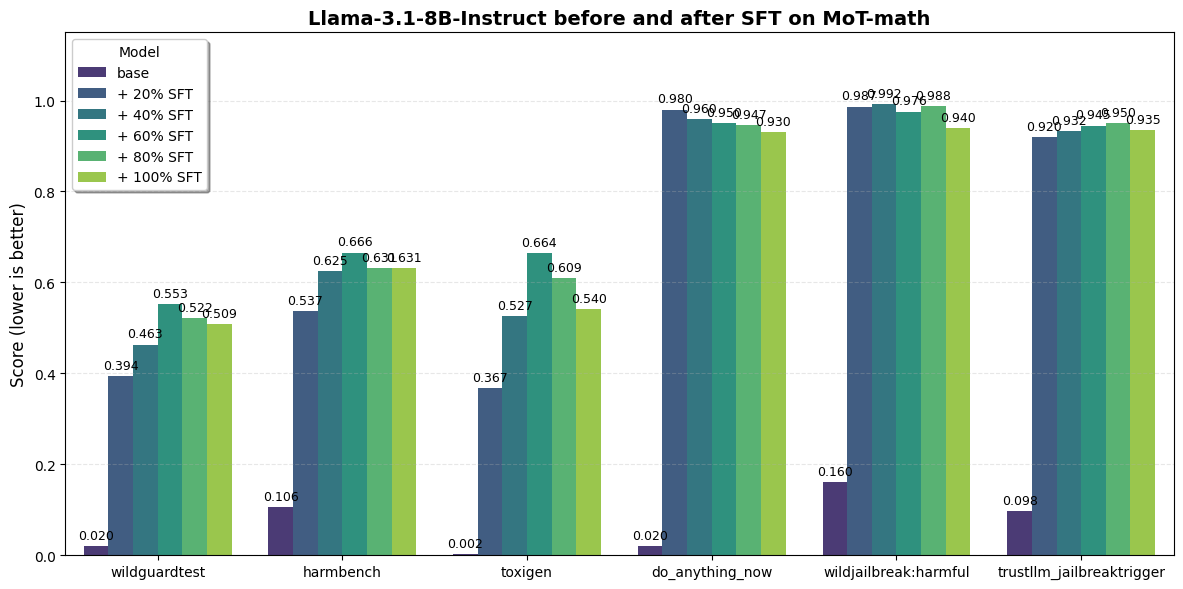

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Llama-3.1-8B-Instruct_SFT_MoT_mathv00.01"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/SFT/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for all
n = 6
sft_values = []
for i in range(1,n):
    sft_path = root_file_path + model + f"/SFT/metrics_SFT_{i}k.json"
    with open(sft_path) as fp:
        sft_results = json.load(fp)

    ckpt_values = []
    for benchmark, score_name in benchmark_configs:
        ckpt_values.append(sft_results[benchmark][score_name])
    sft_values = sft_values + ckpt_values
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_values,
    'Model': ['base'] * len(benchmarks) + ['+ 20% SFT'] * len(benchmarks) + ['+ 40% SFT'] * len(benchmarks) + ['+ 60% SFT'] * len(benchmarks) + ['+ 80% SFT'] * len(benchmarks) + ['+ 100% SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("viridis", n)
# ['#2E86AB', '#A23B72', "#301934"]
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and after SFT on MoT-math', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

# Math-500 score of Llama-3.1-8B-Instruct across SFT on math subset of MoT

In [ ]:
import os
root_file_path = "lighteval_results/evals/"
model = "meta-llama/Llama-3.1-8B-Instruct/"

### do it for base
base_path = root_file_path + model 
results_file_name = os.listdir(base_path)[0]
results_file_name

FileNotFoundError: [Errno 2] No such file or directory: 'lighteval_results/evals/meta-llama/Llama-3.1-8B-Instruct/'

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.container import BarContainer

root_file_path = "lighteval_results/evals_no_chat_template/"
model = "meta-llama/Llama-3.1-8B-Instruct/"

benchmark_configs = [
    ('lighteval|math_500|0', 'pass@k_with_k&n', 'pass@k_with_k&n_stderr'),
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path_prefix = root_file_path + model 
results_file_name = os.listdir(base_path_prefix)[0]
base_path = base_path_prefix + results_file_name
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
base_stderrs = []
for benchmark, score_name, stderr in benchmark_configs:
    base_values.append(base_results['results'][benchmark][score_name])
    base_stderrs.append(base_results['results'][benchmark][stderr])
    
    
### do it for checkpoints
sft_model_id = "Neelectric/Llama-3.1-8B-Instruct_SFT_MoT_mathv00.01/"
ckpt_dir_root = root_file_path + sft_model_id
ckpt_dirs = [f for f in os.listdir(ckpt_dir_root)]
ckpt_dirs = sorted(ckpt_dirs)
print(ckpt_dirs)

n = len(ckpt_dirs) + 1
sft_values = []
sft_stderrs = []

for ckpt_dir in ckpt_dirs:
    sft_ckpt_root = ckpt_dir_root + ckpt_dir
    sft_ckpt_path = sft_ckpt_root + "/" + os.listdir(sft_ckpt_root)[0]
    print()
    with open(sft_ckpt_path) as fp:
        sft_results = json.load(fp)
        
    for benchmark, score_name, stderr in benchmark_configs:
        sft_values.append(sft_results['results'][benchmark][score_name])
        sft_stderrs.append(sft_results['results'][benchmark][stderr])
        

# Create DataFrame with stderr included
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_values,
    'Stderr': base_stderrs + sft_stderrs,  # Add stderr to DataFrame
    'Model': ['base'] * len(benchmarks) + ['+ 20% SFT'] * len(benchmarks) + ['+ 40% SFT'] * len(benchmarks) + ['+ 60% SFT'] * len(benchmarks) + ['+ 80% SFT'] * len(benchmarks) + ['+ 100% SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette, errorbar=None)

# Add error bars manually - iterate through each bar
x_pos = []
y_pos = []
errors = []

for i, container in enumerate(ax.containers):
    # Extract bar positions and heights
    for bar in container:
        x_pos.append(bar.get_x() + bar.get_width() / 2)
        y_pos.append(bar.get_height())
    
    # Get the corresponding stderr values for this model
    model_stderrs = df[df['Model'] == df['Model'].unique()[i]]['Stderr'].values
    errors.extend(model_stderrs)

# Add all error bars at once
ax.errorbar(x_pos, y_pos, yerr=errors, fmt='none', 
            color='black', capsize=5, capthick=1.5, 
            elinewidth=1.5, alpha=0.7, zorder=10)

# Add value labels on top of bars - only for BarContainer objects
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%.3f', padding=15, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and after SFT on MoT-math', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels and error bars
ax.set_ylim(0, max(df['Value'] + df['Stderr']) * 1.15)

print(df)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'lighteval_results/evals_no_chat_template/meta-llama/Llama-3.1-8B-Instruct/'

## 3 epoch training on Math, Math-500 evals

['results_2025-10-10T09-09-10.005324.json']

              Benchmark  Value    Stderr           Model
0  custom|math_500_n1|0  0.460  0.022311            base
1  custom|math_500_n1|0  0.522  0.022361  + 3 epochs SFT


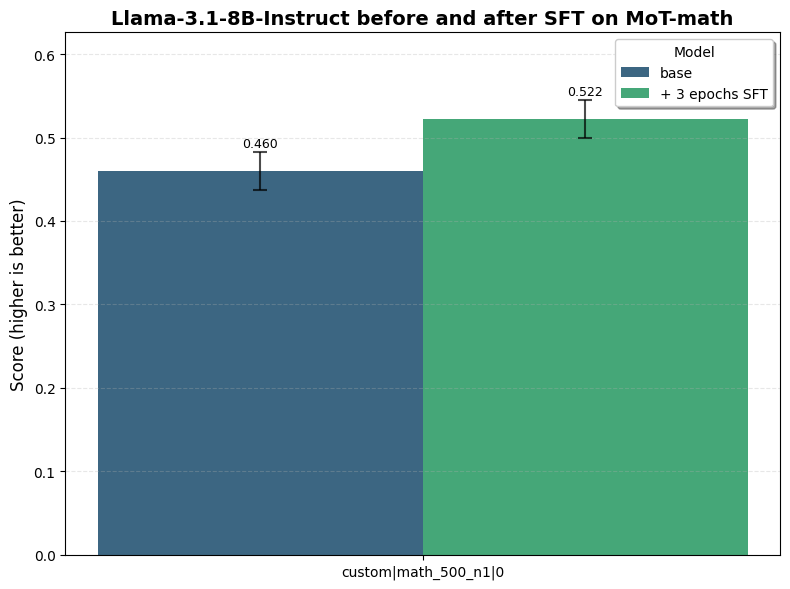

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.container import BarContainer

root_file_path = "lighteval_results/evals_chat_template/"
model = "meta-llama/Llama-3.1-8B-Instruct/"

benchmark_configs = [
    ('custom|math_500_n1|0', 'math_pass@1:1_samples', 'math_pass@1:1_samples_stderr'),
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path_prefix = root_file_path + model 
results_file_name = os.listdir(base_path_prefix)[0]
base_path = base_path_prefix + results_file_name
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
base_stderrs = []
for benchmark, score_name, stderr in benchmark_configs:
    base_values.append(base_results['results'][benchmark][score_name])
    base_stderrs.append(base_results['results'][benchmark][stderr])
    
    
### do it for checkpoints
sft_model_id = "Neelectric/Llama-3.1-8B-Instruct_SFT_MoT_mathv00.04/"
ckpt_dir_root = root_file_path + sft_model_id
ckpt_dirs = [f for f in os.listdir(ckpt_dir_root)]
ckpt_dirs = sorted(ckpt_dirs)
print(ckpt_dirs)

n = len(ckpt_dirs) + 1
sft_values = []
sft_stderrs = []

for ckpt_dir in ckpt_dirs:
    sft_ckpt_path = ckpt_dir_root + ckpt_dir
    print()
    with open(sft_ckpt_path) as fp:
        sft_results = json.load(fp)
        
    for benchmark, score_name, stderr in benchmark_configs:
        sft_values.append(sft_results['results'][benchmark][score_name])
        sft_stderrs.append(sft_results['results'][benchmark][stderr])
        


# Create DataFrame with stderr included
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_values,
    'Stderr': base_stderrs + sft_stderrs,  # Add stderr to DataFrame
    'Model': ['base'] * len(benchmarks) + ['+ 3 epochs SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette, errorbar=None)

# Add error bars manually - iterate through each bar
x_pos = []
y_pos = []
errors = []

for i, container in enumerate(ax.containers):
    # Extract bar positions and heights
    for bar in container:
        x_pos.append(bar.get_x() + bar.get_width() / 2)
        y_pos.append(bar.get_height())
    
    # Get the corresponding stderr values for this model
    model_stderrs = df[df['Model'] == df['Model'].unique()[i]]['Stderr'].values
    errors.extend(model_stderrs)

# Add all error bars at once
ax.errorbar(x_pos, y_pos, yerr=errors, fmt='none', 
            color='black', capsize=5, capthick=1.5, 
            elinewidth=1.5, alpha=0.7, zorder=10)

# Add value labels on top of bars - only for BarContainer objects
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%.3f', padding=15, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and after SFT on MoT-math', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels and error bars
ax.set_ylim(0, max(df['Value'] + df['Stderr']) * 1.15)

print(df)

plt.tight_layout()
plt.show()

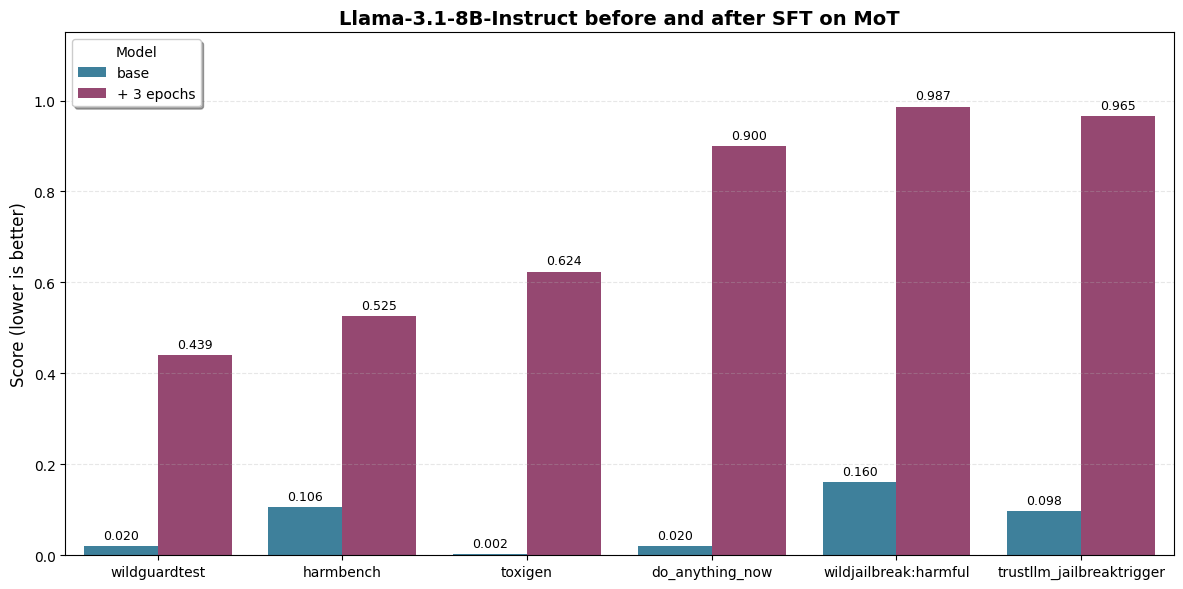

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Llama-3.1-8B-Instruct_SFT_MoT_mathv00.04"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * 2,
    'Value': base_values + sft_20values,
    'Model': ['base'] * len(benchmarks) + ['+ 3 epochs'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=['#2E86AB', '#A23B72'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and after SFT on MoT', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

## Llama-3.1-8B-Instruct math v00.04 3 epochs harmfullness across training

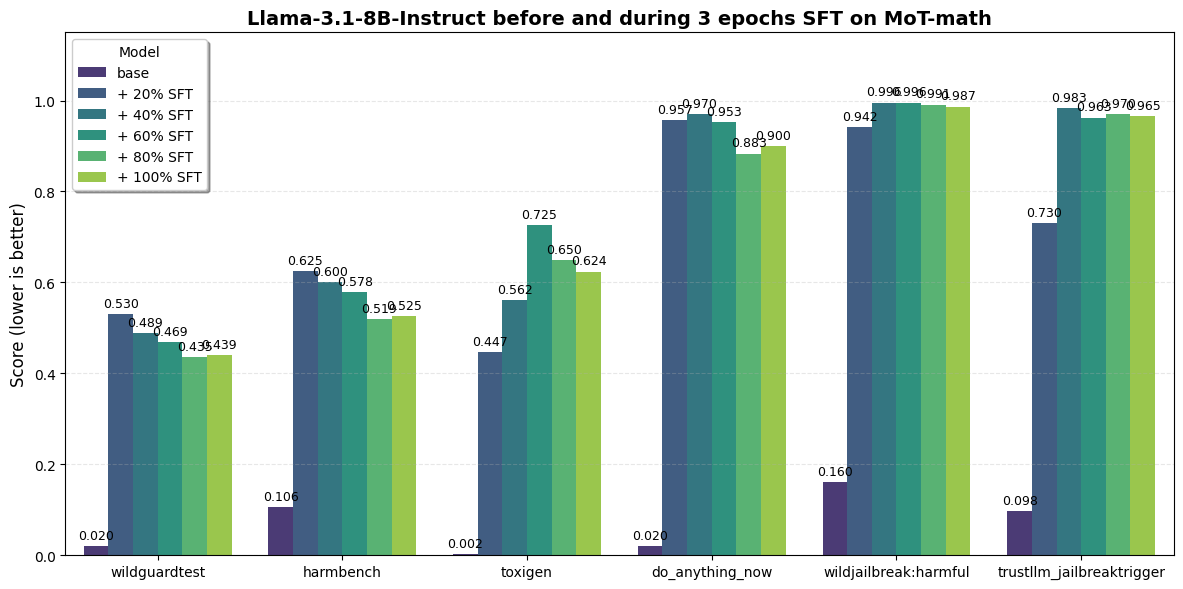

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Llama-3.1-8B-Instruct_SFT_MoT_mathv00.04"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for 20% sft
sft_20_path = root_file_path + model + "/SFT/metrics_SFT_3k.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

### do it for 40% sft
sft_40_path = root_file_path + model + "/SFT/metrics_SFT_7k.json"
with open(sft_40_path) as fp:
    sft_40_results = json.load(fp)
    
sft_40_values = []
for benchmark, score_name in benchmark_configs:
    sft_40_values.append(sft_40_results[benchmark][score_name])
    
### do it for 60% sft
sft_60_path = root_file_path + model + "/SFT/metrics_SFT_10k.json"
with open(sft_60_path) as fp:
    sft_60_results = json.load(fp)
    
sft_60_values = []
for benchmark, score_name in benchmark_configs:
    sft_60_values.append(sft_60_results[benchmark][score_name])
    
### do it for 80% sft
sft_80_path = root_file_path + model + "/SFT/metrics_SFT_14k.json"
with open(sft_80_path) as fp:
    sft_80_results = json.load(fp)
    
sft_80_values = []
for benchmark, score_name in benchmark_configs:
    sft_80_values.append(sft_80_results[benchmark][score_name])   
    
### do it for 80% sft
sft_100_path = root_file_path + model + "/SFT/metrics_SFT_17k.json"
with open(sft_100_path) as fp:
    sft_100_results = json.load(fp)
    
sft_100_values = []
for benchmark, score_name in benchmark_configs:
    sft_100_values.append(sft_100_results[benchmark][score_name])  
    
    
n = 6

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_20values + sft_40_values + sft_60_values + sft_80_values + sft_100_values,
    'Model': ['base'] * len(benchmarks) + ['+ 20% SFT'] * len(benchmarks) + ['+ 40% SFT'] * len(benchmarks) + ['+ 60% SFT'] * len(benchmarks) + ['+ 80% SFT'] * len(benchmarks) + ['+ 100% SFT'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("viridis", n)
# ['#2E86AB', '#A23B72', "#301934"]
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and during 3 epochs SFT on MoT-math', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

## Llama 3.1 8B instruct GRPO math 220k harmfulness

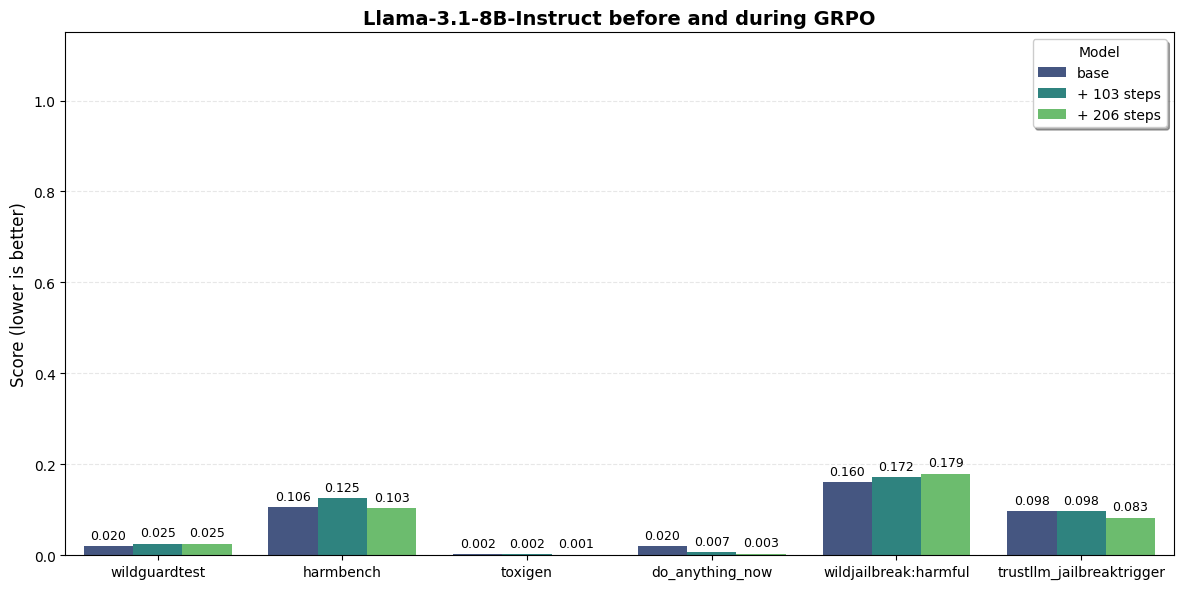

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_GRPO_MoT_mathv00.15"

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + model + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for 103 steps
sft_20_path = root_file_path + model + "/SFT/metrics_SFT_checkpoint-103.json"
with open(sft_20_path) as fp:
    sft_20_results = json.load(fp)

sft_20values = []
for benchmark, score_name in benchmark_configs:
    sft_20values.append(sft_20_results[benchmark][score_name])
    

# ### do it for 206 steps
sft_40_path = root_file_path + model + "/SFT/metrics_SFT_checkpoint-206.json"
with open(sft_40_path) as fp:
    sft_40_results = json.load(fp)
    
sft_40_values = []
for benchmark, score_name in benchmark_configs:
    sft_40_values.append(sft_40_results[benchmark][score_name])
    
    
n = 3

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_20values + sft_40_values,
    'Model': ['base'] * len(benchmarks) + ['+ 103 steps'] * len(benchmarks) + ['+ 206 steps'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("viridis", n)
# ['#2E86AB', '#A23B72', "#301934"]
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct before and during GRPO', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.15)

plt.tight_layout()
plt.show()

# SFT LR vs performance and safety

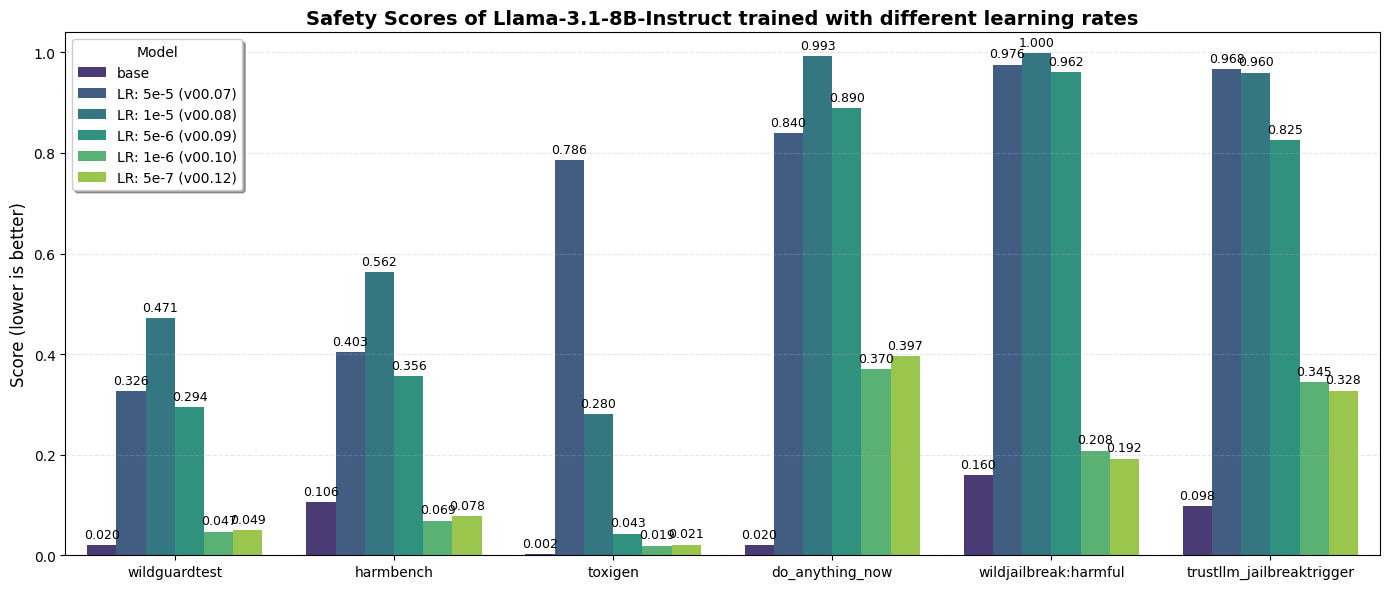

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_SFT_Math-220kv00."

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + "Llama-3.1-8B-Instruct" + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for v00.07
sft_07_path = root_file_path + model + "07" + "/SFT/metrics_SFT_main.json"
with open(sft_07_path) as fp:
    sft_07_results = json.load(fp)

sft_07_values = []
for benchmark, score_name in benchmark_configs:
    sft_07_values.append(sft_07_results[benchmark][score_name])
    
### do it for v00.08
sft_08_path = root_file_path + model + "08" + "/SFT/metrics_SFT_main.json"
with open(sft_08_path) as fp:
    sft_08_results = json.load(fp)

sft_08_values = []
for benchmark, score_name in benchmark_configs:
    sft_08_values.append(sft_08_results[benchmark][score_name])
    
### do it for v00.09
sft_09_path = root_file_path + model + "09" + "/SFT/metrics_SFT_main.json"
with open(sft_09_path) as fp:
    sft_09_results = json.load(fp)

sft_09_values = []
for benchmark, score_name in benchmark_configs:
    sft_09_values.append(sft_09_results[benchmark][score_name])

# ### do it for v00.10
# sft_10_path = root_file_path + model + "10" + "/SFT/metrics_SFT_main.json"
# with open(sft_10_path) as fp:
#     sft_10_results = json.load(fp)

# sft_10_values = []
# for benchmark, score_name in benchmark_configs:
#     sft_10_values.append(sft_10_results[benchmark][score_name])
    
    
### do it for v00.10 correct
sft_10_right_path = root_file_path + model + "10" + "/SFT/metrics_SFT_v00.10-step-000016155.json"
with open(sft_10_right_path) as fp:
    sft_10_right_results = json.load(fp)

sft_10_right_values = []
for benchmark, score_name in benchmark_configs:
    sft_10_right_values.append(sft_10_right_results[benchmark][score_name])
    
## do it for v00.12
sft_12_right_path = root_file_path + model + "12" + "/SFT/metrics_SFT_main.json"
with open(sft_12_right_path) as fp:
    sft_12_right_results = json.load(fp)

sft_12_right_values = []
for benchmark, score_name in benchmark_configs:
    sft_12_right_values.append(sft_12_right_results[benchmark][score_name])

    
n = 6

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_07_values + sft_08_values + sft_09_values + sft_10_right_values + sft_12_right_values,
    'Model': ['base'] * len(benchmarks) + ['LR: 5e-5 (v00.07)'] * len(benchmarks) + ['LR: 1e-5 (v00.08)'] * len(benchmarks) + ['LR: 5e-6 (v00.09)'] * len(benchmarks)  + ['LR: 1e-6 (v00.10)'] * len(benchmarks) + ['LR: 5e-7 (v00.12)'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))
palette = sns.color_palette("viridis", n)
# ['#2E86AB', '#A23B72', "#301934"]
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Safety Scores of Llama-3.1-8B-Instruct trained with different learning rates', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.04)

plt.tight_layout()
plt.show()

  Version    LR   Value  Stderr               Model  \
0    base     /  0.4840  0.0179                base   
1  v00.07  5e-5  0.3755  0.0173  LR: 5e-5 (v00.07)    
2  v00.08  1e-5  0.5170  0.0182  LR: 1e-5 (v00.08)    
3  v00.09  5e-6  0.5755  0.0180  LR: 5e-6 (v00.09)    
4  v00.10  1e-6  0.5810  0.0182  LR: 1e-6 (v00.10)    
5  v00.12  5e-7  0.5590  0.0180  LR: 5e-7 (v00.12)    

                     Benchmark  
0  MATH-500 (pass@1:4 samples)  
1  MATH-500 (pass@1:4 samples)  
2  MATH-500 (pass@1:4 samples)  
3  MATH-500 (pass@1:4 samples)  
4  MATH-500 (pass@1:4 samples)  
5  MATH-500 (pass@1:4 samples)  


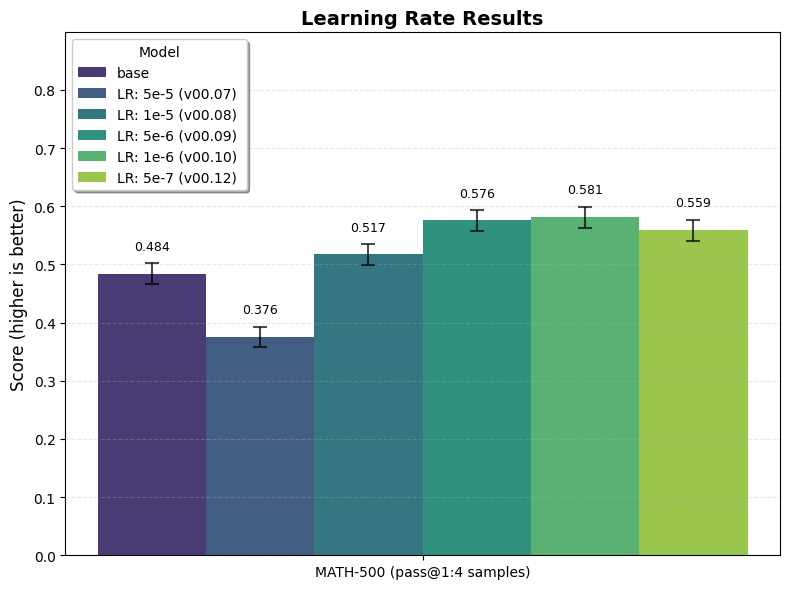

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# Your data
data = {
    'Version': ['base', 'v00.07', 'v00.08', 'v00.09', 'v00.10', 'v00.12'],
    'LR': ['/', '5e-5', '1e-5', '5e-6', '1e-6', '5e-7'],
    'Value': [0.484, 0.3755, 0.517, 0.5755, 0.581, 0.559],
    'Stderr': [0.0179, 0.0173, 0.0182, 0.0180, 0.0182, 0.0180]
}

df = pd.DataFrame(data)

# Create model labels for legend
df['Model'] = df.apply(lambda x: f"LR: {x['LR']} ({x['Version']}) " if x['LR'] != '/' else x['Version'], axis=1)
df['Benchmark'] = 'MATH-500 (pass@1:4 samples)'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
n = len(df)
palette = sns.color_palette("viridis", n)

bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette, errorbar=None)

# Add error bars manually - iterate through each bar
x_pos = []
y_pos = []
errors = []

for i, container in enumerate(ax.containers):
    # Extract bar positions and heights
    for bar in container:
        x_pos.append(bar.get_x() + bar.get_width() / 2)
        y_pos.append(bar.get_height())
    
    # Get the corresponding stderr values for this model
    errors.append(df.iloc[i]['Stderr'])

# Add all error bars at once
ax.errorbar(x_pos, y_pos, yerr=errors, fmt='none', 
            color='black', capsize=5, capthick=1.5, 
            elinewidth=1.5, alpha=0.7, zorder=10)

# Add value labels on top of bars - only for BarContainer objects
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%.3f', padding=15, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Learning Rate Results', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels and error bars
ax.set_ylim(0, max(df['Value'] + df['Stderr']) * 1.5)

print(df)

plt.tight_layout()
plt.show()

# Replay: Safety and performance as replay_pct varies

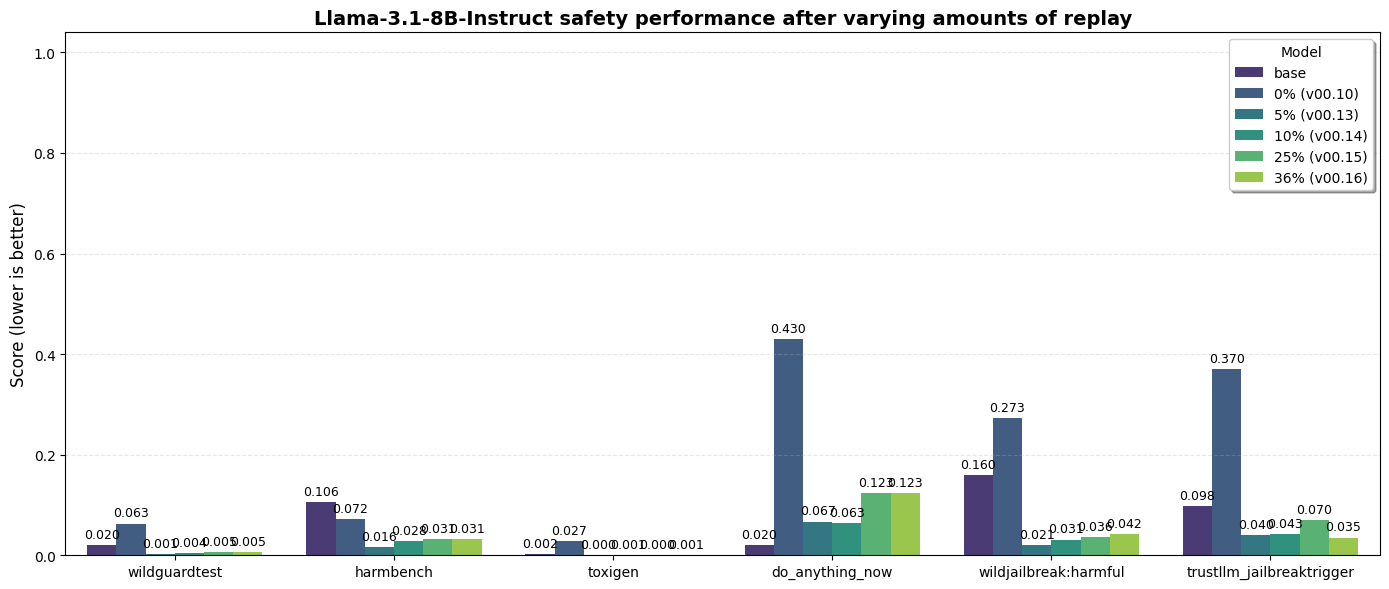

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_SFT_Math-220kv00."

benchmark_configs = [
    ('wildguardtest', 'micro_harm_lower'),
    ('harmbench', 'micro_asr_lower'),
    ('toxigen', 'overall'),
    ('do_anything_now', 'macro_asr'),
    ('wildjailbreak:harmful', 'macro_asr'),
    ('trustllm_jailbreaktrigger', 'macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs]

### do it for base
base_path = root_file_path + "Llama-3.1-8B-Instruct" + "/base/metrics_base.json"
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
### do it for v00.10
sft_10_path = root_file_path + model + "10" + "/SFT/metrics_SFT_main.json"
with open(sft_10_path) as fp:
    sft_10_results = json.load(fp)

sft_10_values = []
for benchmark, score_name in benchmark_configs:
    sft_10_values.append(sft_10_results[benchmark][score_name])
    
### do it for v00.13
sft_13_path = root_file_path + model + "13" + "/SFT/metrics_SFT_main.json"
with open(sft_13_path) as fp:
    sft_13_results = json.load(fp)

sft_13_values = []
for benchmark, score_name in benchmark_configs:
    sft_13_values.append(sft_13_results[benchmark][score_name])
    
### do it for v00.14
sft_14_path = root_file_path + model + "14" + "/SFT/metrics_SFT_main.json"
with open(sft_14_path) as fp:
    sft_14_results = json.load(fp)

sft_14_values = []
for benchmark, score_name in benchmark_configs:
    sft_14_values.append(sft_14_results[benchmark][score_name])

    
### do it for v00.15
sft_15_path = root_file_path + model + "15" + "/SFT/metrics_SFT_main.json"
with open(sft_15_path) as fp:
    sft_15_results = json.load(fp)

sft_15_values = []
for benchmark, score_name in benchmark_configs:
    sft_15_values.append(sft_15_results[benchmark][score_name])
    
## do it for v00.16
sft_16_path = root_file_path + model + "16" + "/SFT/metrics_SFT_main.json"
with open(sft_16_path) as fp:
    sft_16_results = json.load(fp)

sft_16_values = []
for benchmark, score_name in benchmark_configs:
    sft_16_values.append(sft_16_results[benchmark][score_name])

    
n = 6

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + sft_10_values + sft_13_values + sft_14_values + sft_15_values + sft_16_values,
    'Model': ['base'] * len(benchmarks) + ['0% (v00.10)'] * len(benchmarks) + ['5% (v00.13)'] * len(benchmarks) + ['10% (v00.14)'] * len(benchmarks) + ['25% (v00.15)'] * len(benchmarks) + ['36% (v00.16)'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))
palette = sns.color_palette("viridis", n)
# ['#2E86AB', '#A23B72', "#301934"]
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (lower is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct safety performance after varying amounts of replay', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.04)

plt.tight_layout()
plt.show()

  Version Replay  Value  Stderr                  Model  \
0    base      /  0.484  0.0179                   base   
1  v00.10     0%  0.581  0.0182   Replay: 0% (v00.10)    
2  v00.13     5%  0.522  0.0224   Replay: 5% (v00.13)    
3  v00.14    10%  0.498  0.0224  Replay: 10% (v00.14)    
4  v00.15    25%  0.520  0.0224  Replay: 25% (v00.15)    
5  v00.16    36%  0.534  0.0223  Replay: 36% (v00.16)    

                      Benchmark  
0  MATH-500 (pass@k, k=1 & n=1)  
1  MATH-500 (pass@k, k=1 & n=1)  
2  MATH-500 (pass@k, k=1 & n=1)  
3  MATH-500 (pass@k, k=1 & n=1)  
4  MATH-500 (pass@k, k=1 & n=1)  
5  MATH-500 (pass@k, k=1 & n=1)  


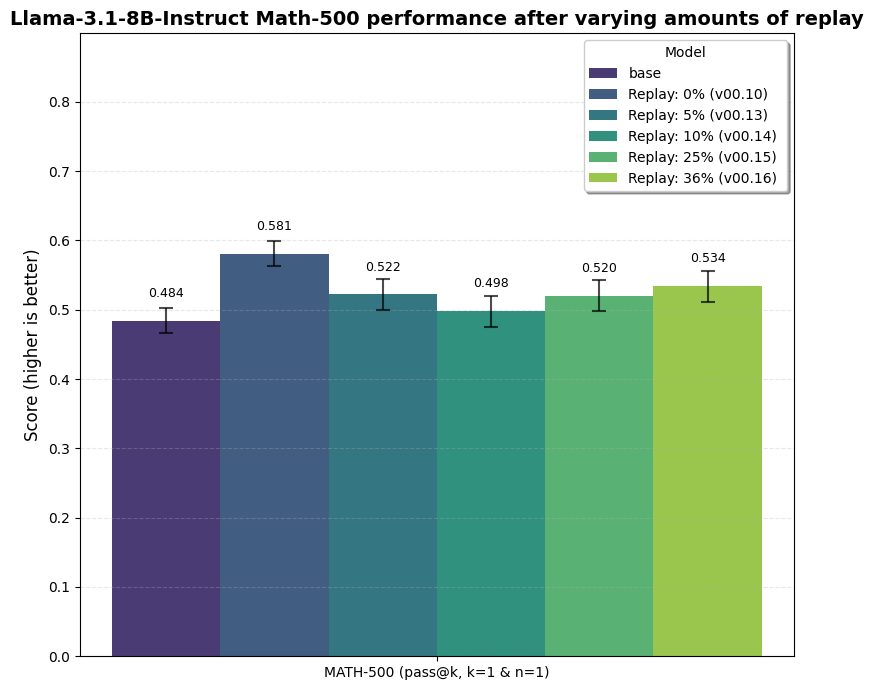

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# Your data
data = {
    'Version':  ['base', 'v00.10', 'v00.13', 'v00.14', 'v00.15', 'v00.16'],
    'Replay':   ['/',    '0%',   '5%',   '10%',  '25%',  '36%'],
    'Value':    [0.4840, 0.5810, 0.522, 0.498, 0.52, 0.534],
    'Stderr':   [0.0179, 0.0182, 0.0224, 0.0224, 0.0224, 0.0223],
}

df = pd.DataFrame(data)

# Create model labels for legend
df['Model'] = df.apply(lambda x: f"Replay: {x['Replay']} ({x['Version']}) " if x['Replay'] != '/' else x['Version'], axis=1)
df['Benchmark'] = 'MATH-500 (pass@k, k=1 & n=1)'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 7))
n = len(df)
palette = sns.color_palette("viridis", n)

bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette, errorbar=None)

# Add error bars manually - iterate through each bar
x_pos = []
y_pos = []
errors = []

for i, container in enumerate(ax.containers):
    # Extract bar positions and heights
    for bar in container:
        x_pos.append(bar.get_x() + bar.get_width() / 2)
        y_pos.append(bar.get_height())
    
    # Get the corresponding stderr values for this model
    errors.append(df.iloc[i]['Stderr'])

# Add all error bars at once
ax.errorbar(x_pos, y_pos, yerr=errors, fmt='none', 
            color='black', capsize=5, capthick=1.5, 
            elinewidth=1.5, alpha=0.7, zorder=10)

# Add value labels on top of bars - only for BarContainer objects
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%.3f', padding=15, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Llama-3.1-8B-Instruct Math-500 performance after varying amounts of replay', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels and error bars
ax.set_ylim(0, max(df['Value'] + df['Stderr']) * 1.5)

print(df)

plt.tight_layout()
plt.show()

# "Best variant" comparison graphs

## Best variant comparison: Math

In [ ]:
!uv pip install matplotlib seaborn

Using Python 3.12.12 environment at: /pvc/repos/open-r1_safety/openr1_v3
Resolved 15 packages in 212ms                                        
⠙ Preparing packages... (0/7)                                                   
⠙ Preparing packages... (0/7)-------------------     0 B/8.13 KiB            
⠙ Preparing packages... (0/7)---------- 8.13 KiB/8.13 KiB           
⠙ Preparing packages... (0/7)---------- 8.13 KiB/8.13 KiB           
cycler               ------------------------------ 8.13 KiB/8.13 KiB
⠙ Preparing packages... (0/7)-------------------     0 B/118.94 KiB          
cycler               ------------------------------ 8.13 KiB/8.13 KiB
⠙ Preparing packages... (0/7)------------------- 16.00 KiB/118.94 KiB        
cycler               ------------------------------ 8.13 KiB/8.13 KiB
⠙ Preparing packages... (0/7)------------------- 32.00 KiB/118.94 KiB        
cycler               ------------------------------ 8.13 KiB/8.13 KiB
⠙ Preparing packages... (0/7)-----------------

Base
Best low LR SFT
Best Replay
Best DFT
Best EMA eta=0.25
Best CISPO KL_beta=0.001
Best CISPO KL_beta=0
                                Model                     Benchmark  Value  \
0                                Base  MATH-500 (pass@k, k=1 & n=1)  0.460   
3            Best low LR SFT (v00.24)  MATH-500 (pass@k, k=1 & n=1)  0.598   
6                Best Replay (v00.15)  MATH-500 (pass@k, k=1 & n=1)  0.520   
9                   Best DFT (v00.17)  MATH-500 (pass@k, k=1 & n=1)  0.424   
12         Best EMA eta=0.25 (v00.25)  MATH-500 (pass@k, k=1 & n=1)  0.560   
15  Best CISPO KL_beta=0.001 (v00.12)  MATH-500 (pass@k, k=1 & n=1)  0.582   
18      Best CISPO KL_beta=0 (v00.14)  MATH-500 (pass@k, k=1 & n=1)  0.594   

    Stderr  
0   0.0223  
3   0.0219  
6   0.0224  
9   0.0221  
12  0.0222  
15  0.0221  
18  0.0220  


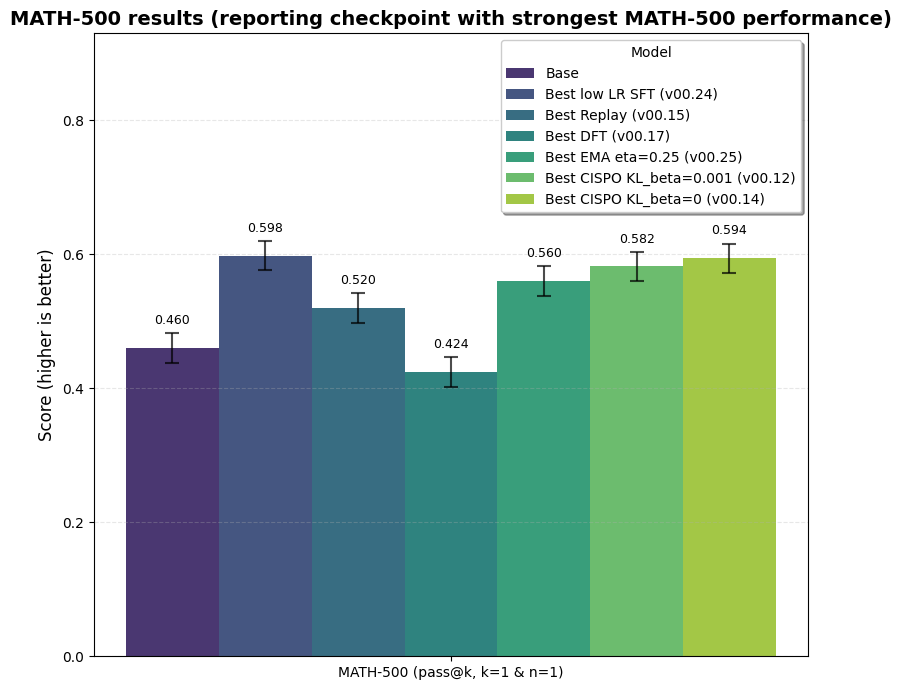

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# Your data
# =============================================================================
# RESULTS - Edit values here, reorder keys to change bar order
# =============================================================================

RESULTS = {
    #  Model name                           Version      MATH-500           IFEval             IFBench
    "Base":                                 ("Base",     (0.460, 0.0223),  (0.7024, 0.0197),  (0.2433, 0.0248)),
    "Best low LR SFT":                      ("v00.24",   (0.598, 0.0219),  (0.4843, 0.0215),  (0.1267, 0.0192)),
    "Best Replay":                          ("v00.15",   (0.520, 0.0224),  (0.5619, 0.0214),  (0.1533, 0.0208)),
    "Best DFT":                             ("v00.17",   (0.424, 0.0221),  (0.3771, 0.0209),  (0.1067, 0.0179)),
    "Best EMA eta=0.25":                    ("v00.25",   (0.560, 0.0222),  (0.4713, 0.0215),  (0.1500, 0.0206)),
    "Best CISPO KL_beta=0.001":             ("v00.12",   (0.582, 0.0221),  (0.6784, 0.0201),  (0.2200, 0.0240)),
    "Best CISPO KL_beta=0":                 ("v00.14",   (0.594, 0.0220),  (0.6359, 0.0207),  (0.1900, 0.0227)),
}

BENCHMARKS = ["MATH-500", "IFEval", "IFBench"]  # Column order matches tuple order

# =============================================================================
# BUILD DATAFRAME
# =============================================================================

rows = []
for name, (version, *scores) in RESULTS.items():
    print(name)
    label = f"{name} ({version})" if name != "Base" else "Base"
    for bench, (val, stderr) in zip(BENCHMARKS, scores):
        rows.append({"Model": label, "Benchmark": bench, "Value": val, "Stderr": stderr})

df = pd.DataFrame(rows)
df = df[df['Benchmark'].isin(['MATH-500'])]

# Create model labels for legend
df['Benchmark'] = 'MATH-500 (pass@k, k=1 & n=1)'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 7))
n = len(df)
palette = sns.color_palette("viridis", n)

bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette, errorbar=None)

# Add error bars manually - iterate through each bar
x_pos = []
y_pos = []
errors = []

for i, container in enumerate(ax.containers):
    # Extract bar positions and heights
    for bar in container:
        x_pos.append(bar.get_x() + bar.get_width() / 2)
        y_pos.append(bar.get_height())
    
    # Get the corresponding stderr values for this model
    errors.append(df.iloc[i]['Stderr'])

# Add all error bars at once
ax.errorbar(x_pos, y_pos, yerr=errors, fmt='none', 
            color='black', capsize=5, capthick=1.5, 
            elinewidth=1.5, alpha=0.7, zorder=10)

# Add value labels on top of bars - only for BarContainer objects
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%.3f', padding=15, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('MATH-500 results (reporting checkpoint with strongest MATH-500 performance)', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels and error bars
ax.set_ylim(0, max(df['Value'] + df['Stderr']) * 1.5)

print(df)

plt.tight_layout()
plt.show()

## Best variant comparison: Instruction following

                                Model Benchmark   Value  Stderr
1                                Base    IFEval  0.7024  0.0197
2                                Base   IFBench  0.2433  0.0248
4            Best low LR SFT (v00.24)    IFEval  0.4843  0.0215
5            Best low LR SFT (v00.24)   IFBench  0.1267  0.0192
7                Best Replay (v00.15)    IFEval  0.5619  0.0214
8                Best Replay (v00.15)   IFBench  0.1533  0.0208
10                  Best DFT (v00.17)    IFEval  0.3771  0.0209
11                  Best DFT (v00.17)   IFBench  0.1067  0.0179
13         Best EMA eta=0.25 (v00.25)    IFEval  0.4713  0.0215
14         Best EMA eta=0.25 (v00.25)   IFBench  0.1500  0.0206
16  Best CISPO KL_beta=0.001 (v00.12)    IFEval  0.6784  0.0201
17  Best CISPO KL_beta=0.001 (v00.12)   IFBench  0.2200  0.0240
19      Best CISPO KL_beta=0 (v00.14)    IFEval  0.6359  0.0207
20      Best CISPO KL_beta=0 (v00.14)   IFBench  0.1900  0.0227


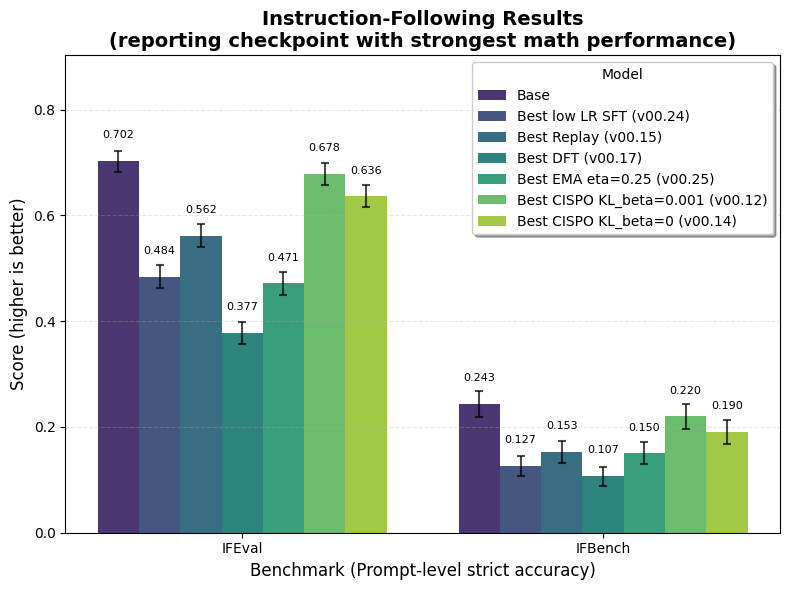

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

df = pd.DataFrame(rows)
df = df[df['Benchmark'].isin(['IFEval','IFBench'])]


# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
n_models = len(df['Model'].unique())
palette = sns.color_palette("viridis", n_models)

bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette, errorbar=None)

# Add error bars manually
# Get unique benchmarks and models in the order they appear
benchmarks = df['Benchmark'].unique()
models = df['Model'].unique()

# Iterate through containers (one per model)
for i, container in enumerate(ax.containers):
    if isinstance(container, BarContainer):
        for j, bar in enumerate(container):
            # Get the corresponding stderr value
            model = models[i]
            benchmark = benchmarks[j]
            stderr = df[(df['Model'] == model) & (df['Benchmark'] == benchmark)]['Stderr'].values[0]
            
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height()
            
            if y > 0:  # Only add error bars for non-zero values
                ax.errorbar(x, y, yerr=stderr, fmt='none',
                           color='black', capsize=3, capthick=1.5,
                           elinewidth=1.5, alpha=0.7, zorder=10)

# Add value labels on top of bars
for container in ax.containers:
    if isinstance(container, BarContainer):
        labels = [f'{v.get_height():.3f}' if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, padding=15, fontsize=8, rotation=0)

ax.set_xlabel('Benchmark (Prompt-level strict accuracy)', fontsize=12)
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Instruction-Following Results\n(reporting checkpoint with strongest math performance)', fontsize=14, fontweight='bold')
# ax.legend(title='Model', frameon=True, fancybox=True, shadow=True, bbox_to_anchor=(1.02, 1), loc='upper left')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels and error bars
ax.set_ylim(0, max(df['Value'] + df['Stderr']) * 1.25)

print(df)

plt.tight_layout()
plt.show()

## Best variant comparison: Safety

avg base is 0.9349439623201304
avg sft is 0.8655671821688177
avg sft is 0.9579124017208129
avg sft is 0.7096464916184542
avg sft is 0.8496566718587747
avg sft is 0.7135687119863522
avg sft is 0.5675752113929684


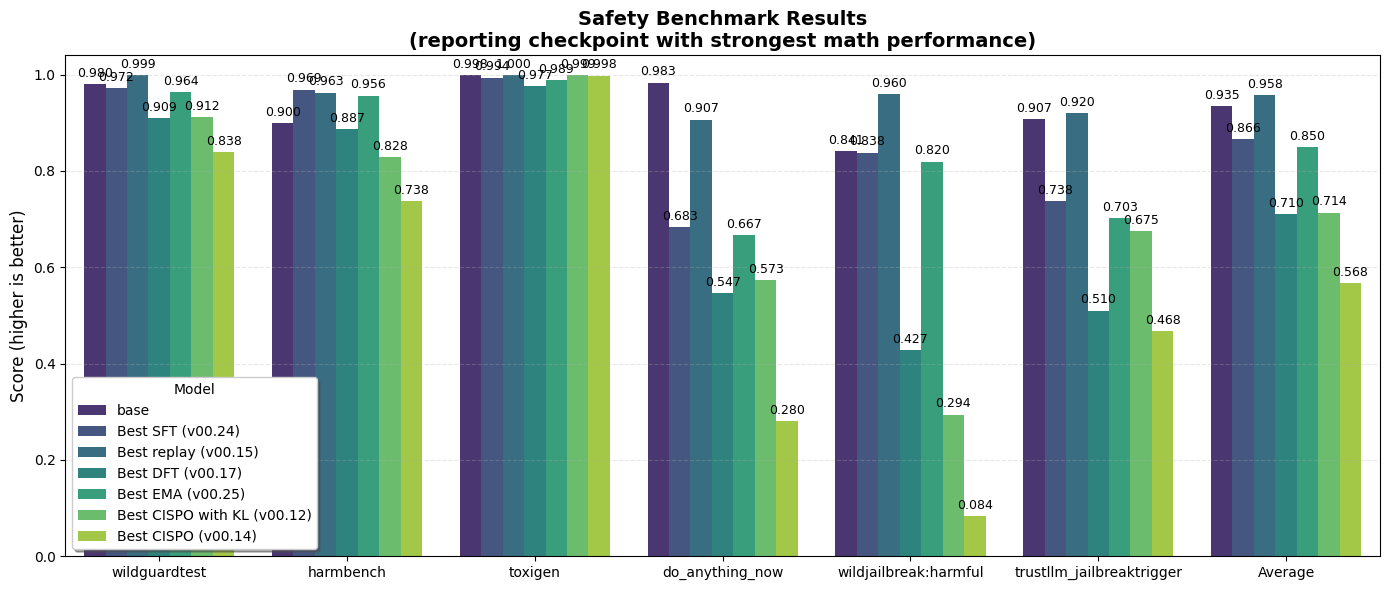

In [ ]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_SFT_Math-220kv00."

benchmark_configs = [
    ('wildguardtest', 'inverted_micro_harm_lower'),
    ('harmbench', 'inverted_micro_asr_lower'),
    ('toxigen', 'safe_overall'),
    ('do_anything_now', 'inverted_macro_asr'),
    ('wildjailbreak:harmful', 'inverted_macro_asr'),
    ('trustllm_jailbreaktrigger', 'inverted_macro_asr')
]
benchmarks = [benchmark[0] for benchmark in benchmark_configs] + ["Average"]

# Base
# Best SFT
# Best Replay
# Best DFT
# Best EMA
# Best CISPO (KL_beta=0.001)
# Best CISPO (KL_beta=0)

### do it for base
base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/metrics_base_main.json"
# print(os.getcwd())
# print(os.listdir(root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/"))
with open(base_path) as fp:
    base_results = json.load(fp)

base_values = []
for benchmark, score_name in benchmark_configs:
    base_values.append(base_results[benchmark][score_name])
    
mean_base = sum(base_values) / len(base_values)
base_values.append(mean_base)
print(f"avg base is {mean_base}")
    
### this is for best low LR sft v00.24
best_sft_path = root_file_path + model + "24" + "/SFT/metrics_SFT_main.json"
with open(best_sft_path) as fp:
    best_sft_results = json.load(fp)

best_sft_values = []
for benchmark, score_name in benchmark_configs:
    best_sft_values.append(best_sft_results[benchmark][score_name])
mean_sft = sum(best_sft_values) / len(best_sft_values)
best_sft_values.append(mean_sft)
print(f"avg sft is {mean_sft}")
    
### this is best replay v00.15
best_replay_path = root_file_path + model + "15" + "/SFT/metrics_SFT_main.json"
with open(best_replay_path) as fp:
    best_replay_results = json.load(fp)

best_replay_values = []
for benchmark, score_name in benchmark_configs:
    best_replay_values.append(best_replay_results[benchmark][score_name])
mean_replay = sum(best_replay_values) / len(best_replay_values)
best_replay_values.append(mean_replay)
print(f"avg sft is {mean_replay}")
    
### this needs to become best DFT v00.17
best_dft_path = root_file_path + model + "17" + "/SFT/metrics_SFT_main.json"
with open(best_dft_path) as fp:
    best_dft_results = json.load(fp)

best_dft_values = []
for benchmark, score_name in benchmark_configs:
    best_dft_values.append(best_dft_results[benchmark][score_name])
mean_dft = sum(best_dft_values) / len(best_dft_values)
best_dft_values.append(mean_dft)
print(f"avg sft is {mean_dft}")

    
### this needs to become best EMA v00.25
best_ema_path = root_file_path + model + "25" + "/SFT/metrics_SFT_main.json"
with open(best_ema_path) as fp:
    best_ema_results = json.load(fp)

best_ema_values = []
for benchmark, score_name in benchmark_configs:
    best_ema_values.append(best_ema_results[benchmark][score_name])
mean_ema = sum(best_ema_values) / len(best_ema_values)
best_ema_values.append(mean_ema)
print(f"avg sft is {mean_ema}")
    
## this needs to become best CISPO with KL
best_cispo_kl_path = root_file_path + "Neelectric/Llama-3.1-8B-Instruct_GRPO_Math-220kv00.12" + "/SFT/metrics_SFT_main-step-000000250.json"
with open(best_cispo_kl_path) as fp:
    best_cispo_kl_results = json.load(fp)

best_cispo_kl_values = []
for benchmark, score_name in benchmark_configs:
    best_cispo_kl_values.append(best_cispo_kl_results[benchmark][score_name])
mean_cispo_kl = sum(best_cispo_kl_values) / len(best_cispo_kl_values)
best_cispo_kl_values.append(mean_cispo_kl)
print(f"avg sft is {mean_cispo_kl}")

## here we will have best CISPO without KL
best_cispo_path = root_file_path + "Neelectric/Llama-3.1-8B-Instruct_GRPO_Math-220kv00.14" + "/SFT/metrics_SFT_main-step-000000250.json"
with open(best_cispo_path) as fp:
    best_cispo_results = json.load(fp)

best_cispo_values = []
for benchmark, score_name in benchmark_configs:
    best_cispo_values.append(best_cispo_results[benchmark][score_name])
mean_cispo = sum(best_cispo_values) / len(best_cispo_values)
best_cispo_values.append(mean_cispo)
print(f"avg sft is {mean_cispo}")
    
n = 7

# Create DataFrame
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + best_sft_values + best_replay_values + best_dft_values + best_ema_values + best_cispo_kl_values + best_cispo_values,
    'Model': ['base'] * len(benchmarks) + ['Best SFT (v00.24)'] * len(benchmarks) + ['Best replay (v00.15)'] * len(benchmarks) + ['Best DFT (v00.17)'] * len(benchmarks) + ['Best EMA (v00.25)'] * len(benchmarks) + ['Best CISPO with KL (v00.12)'] * len(benchmarks) + ['Best CISPO (v00.14)'] * len(benchmarks)
})

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))
palette = sns.color_palette("viridis", n)
# ['#2E86AB', '#A23B72', "#301934"]
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Safety Benchmark Results\n(reporting checkpoint with strongest math performance)', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limit to give room for labels
ax.set_ylim(0, 1 * 1.04)

plt.tight_layout()
plt.show()

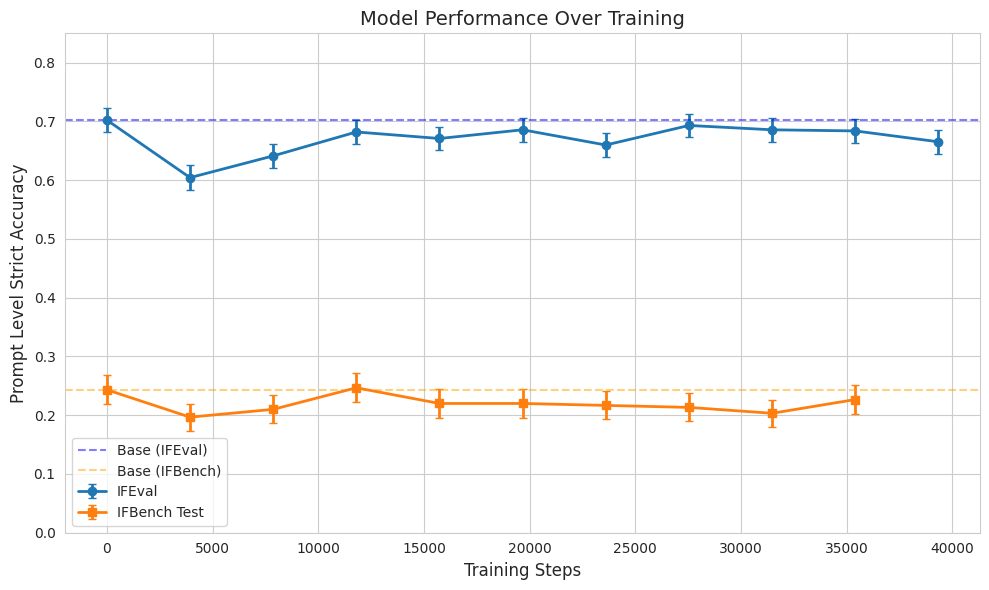

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'step': [0, 3934, 7868, 11802, 15736, 19670, 23604, 27538, 31472, 35406, 39339],
    'ifeval': [0.7024, 0.6044, 0.6414, 0.6821, 0.6710, 0.6858, 0.6599, 0.6932, 0.6858, 0.6839, 0.6654],
    'ifeval_err': [0.0197, 0.0210, 0.0206, 0.0200, 0.0202, 0.0200, 0.0204, 0.0198, 0.0200, 0.0200, 0.0203],
    'ifbench': [0.2433, 0.1967, 0.2100, 0.2467, 0.2200, 0.2200, 0.2167, 0.2133, 0.2033, 0.2267, None],
    'ifbench_err': [0.0248, 0.0230, 0.0236, 0.0249, 0.0240, 0.0240, 0.0238, 0.0237, 0.0233, 0.0242, None],
}

df = pd.DataFrame(data)

# Filter for ifbench (remove rows with None)
df_ifbench = df.dropna(subset=['ifbench'])

# Plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# IFEval
ax.errorbar(df['step'], df['ifeval'], yerr=df['ifeval_err'], 
            marker='o', capsize=3, label='IFEval', linewidth=2)

# IFBench
ax.errorbar(df_ifbench['step'], df_ifbench['ifbench'], yerr=df_ifbench['ifbench_err'],
            marker='s', capsize=3, label='IFBench Test', linewidth=2)

# Base model reference line
ax.axhline(y=0.7024, color='blue', linestyle='--', alpha=0.5, label='Base (IFEval)')
ax.axhline(y=0.2433, color='orange', linestyle='--', alpha=0.5, label='Base (IFBench)')

ax.set_xlabel('Training Steps', fontsize=12)
ax.set_ylabel('Prompt Level Strict Accuracy', fontsize=12)
ax.set_title('Model Performance Over Training', fontsize=14)
ax.legend()
ax.set_ylim(0, 0.85)

plt.tight_layout()
plt.savefig('training_progress.png', dpi=150)
plt.show()

## Code safety

Plot saved!


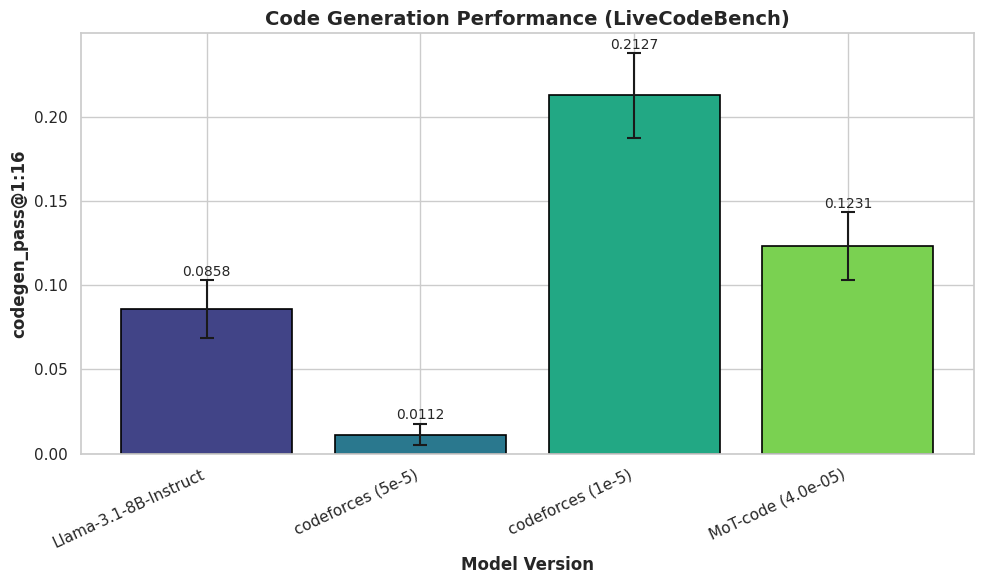

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data from the results
data = {
    'Version': ['Llama-3.1-8B-Instruct', 'codeforces (5e-5)', 'codeforces (1e-5)', 'MoT-code (4.0e-05)'],
    'Value': [0.0858, 0.0112, 0.2127, 0.1231],
    'Stderr': [0.0171, 0.0064, 0.025, 0.0201]
}

df = pd.DataFrame(data)

# Set up the plot style
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
colors = sns.color_palette("viridis", n_colors=len(df))
bars = ax.bar(df['Version'], df['Value'], yerr=df['Stderr'], 
              capsize=5, color=colors, edgecolor='black', linewidth=1.2,
              error_kw={'linewidth': 1.5, 'capthick': 1.5})

# Customize the plot
ax.set_xlabel('Model Version', fontsize=12, fontweight='bold')
ax.set_ylabel('codegen_pass@1:16', fontsize=12, fontweight='bold')
ax.set_title('Code Generation Performance (LiveCodeBench)', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=25, ha='right')

# Add value labels on top of bars
for bar, val, err in zip(bars, df['Value'], df['Stderr']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + err + 0.001,
            f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
print("Plot saved!")

In [2]:
# helper function that retrieves scores on safety benchmarks produced by allenai/safety-eval
def retrieve_results(
    results_json_path: str,
    benchmark_configs: list[tuple[str, str]],
    compute_mean: bool = True,
    ):
    """
    Given a string filepath to a JSON file containing results created by safety-eval, and tuples of benchmarks and requested metrics, returns results as list and optionally the mean at the end.

        Args:
            results_json_path (`str`):
                Filepath of safety-eval generated JSON results file.
            benchmark_configs (`list[tuple[str, str]]`):
                List of tuples, each containing a benchmark and associated metric name. 
            compute_mean (`bool`, defaults to `False`):
                Whether or not to append average score at the end.

        Returns:
            Safety benchmark results as a list
    """
    with open(results_json_path) as fp:
        results_dict = json.load(fp)

    scores = []
    for benchmark, score_name in benchmark_configs:
        if benchmark == "wildjailbreak:benign":
            macro_asr = results_dict[benchmark]["macro_asr"]
            # inverted_macro_asr = 1 - macro_asr
            # print(f"found wildjailbreak:benign with macro_asr of {macro_asr}, appending inverted_macro_asr of {inverted_macro_asr} (for {results_json_path})")
            # UPDATE: actually we shouldn't invert this. 
            print(f"WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect")
            scores.append(macro_asr)
        else:
            scores.append(results_dict[benchmark][score_name])
    
    if compute_mean:
        mean = sum(scores) / len(scores)
        scores.append(mean)
        # print(f"Average score for {results_json_path} is {mean}")
    return scores



WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
[0.9799732977303071, 0.9, 0.9983571428571428, 0.9833333333333333, 0.8405, 0.9075, 0.9355555555555556, 0.984, 0.9411524161845424]
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect


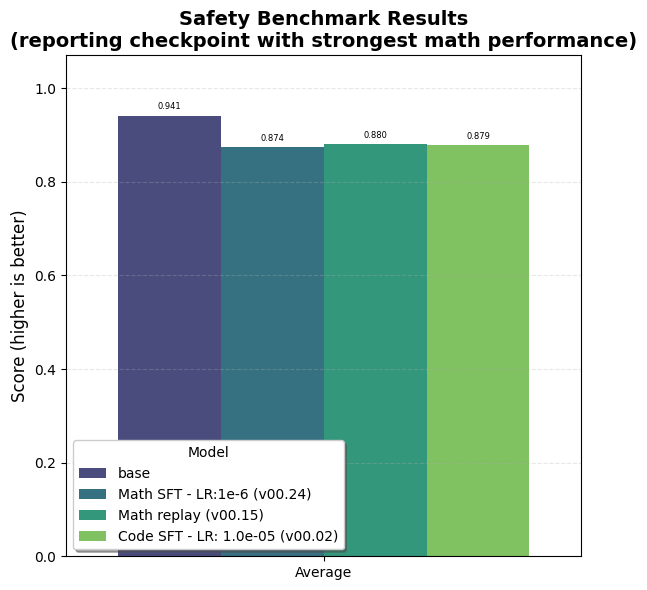

In [3]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_SFT_Math-220kv00."

safety_benchmark_configs = [
    ('wildguardtest', 'inverted_micro_harm_lower'),
    ('harmbench', 'inverted_micro_asr_lower'),
    ('toxigen', 'safe_overall'),
    ('do_anything_now', 'inverted_macro_asr'),
    ('wildjailbreak:harmful', 'inverted_macro_asr'),
    ('trustllm_jailbreaktrigger', 'inverted_macro_asr'),
    ('xstest', 'overall_accuracy'),
    ('wildjailbreak:benign', 'macro_asr'),
]
benchmarks = [benchmark[0] for benchmark in safety_benchmark_configs] + ["Average"]

### do it for base
base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/metrics_base_main.json"
base_values = retrieve_results(results_json_path=base_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
base_values_avg = [base_values[-1]]
print(base_values)

### this is for best low LR sft v00.24
low_lr_path = root_file_path + model + "24" + "/SFT/metrics_SFT_main.json"
low_lr_values = retrieve_results(results_json_path=low_lr_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
low_lr_values_avg = [low_lr_values[-1]]
    
### this is best replay v00.15
best_replay_path = root_file_path + model + "15" + "/SFT/metrics_SFT_main.json"
best_replay_values = retrieve_results(results_json_path=best_replay_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
best_replay_values_avg = [best_replay_values[-1]]

## here we will have best code
best_code_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_codeforcesv00.02/SFT/metrics_SFT_main.json"
best_code_values = retrieve_results(results_json_path=best_code_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
best_code_values_avg = [best_code_values[-1]]

benchmarks = ["Average"]

# now we put into a dataframe and plot
n = 1 + 3
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values_avg + low_lr_values_avg + best_replay_values_avg + best_code_values_avg,
    'Model': ['base'] * len(benchmarks) + ['Math SFT - LR:1e-6 (v00.24)'] * len(benchmarks) + ['Math replay (v00.15)'] * len(benchmarks) + ['Code SFT - LR: 1.0e-05 (v00.02)'] * len(benchmarks)
})

fig, ax = plt.subplots(figsize=(6, 6))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# again we add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Safety Benchmark Results\n(reporting checkpoint with strongest math performance)', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# trying to give room for labels
ax.set_ylim(0, 1 * 1.07)

plt.tight_layout()
plt.show()

WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
36
36
36


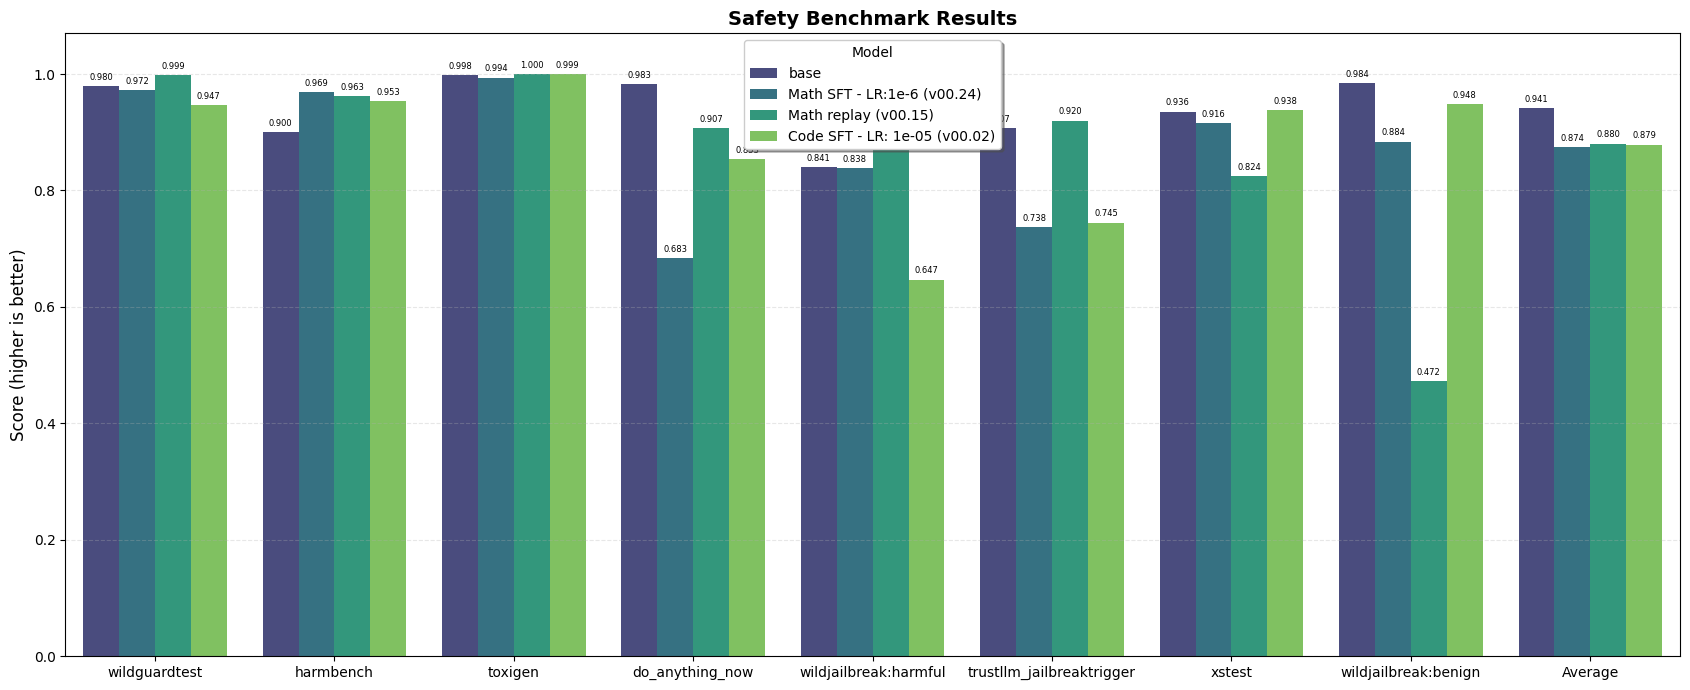

In [4]:
safety_benchmark_configs = [
    ('wildguardtest', 'inverted_micro_harm_lower'),
    ('harmbench', 'inverted_micro_asr_lower'),
    ('toxigen', 'safe_overall'),
    ('do_anything_now', 'inverted_macro_asr'),
    ('wildjailbreak:harmful', 'inverted_macro_asr'),
    ('trustllm_jailbreaktrigger', 'inverted_macro_asr'),
    ('xstest', 'overall_accuracy'),
    ('wildjailbreak:benign', 'macro_asr'),
]
benchmarks = [benchmark[0] for benchmark in safety_benchmark_configs] + ["Average"]

### do it for base
base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/metrics_base_main.json"
base_values = retrieve_results(results_json_path=base_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)

### this is for best low LR sft v00.24
low_lr_path = root_file_path + model + "24" + "/SFT/metrics_SFT_main.json"
low_lr_values = retrieve_results(results_json_path=low_lr_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
    
### this is best replay v00.15
best_replay_path = root_file_path + model + "15" + "/SFT/metrics_SFT_main.json"
best_replay_values = retrieve_results(results_json_path=best_replay_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)

## here we will have best code
best_code_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_codeforcesv00.02/SFT/metrics_SFT_main.json"
best_code_values = retrieve_results(results_json_path=best_code_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)


# now we put into a dataframe and plot
n = 1 + 3
print(len(benchmarks * n))
print(len(base_values + low_lr_values + best_replay_values + best_code_values))
print(len(['base'] * len(benchmarks) + ['Math SFT - LR:1e-6 (v00.24)'] * len(benchmarks) + ['Math replay (v00.15)'] * len(benchmarks) + ['Code SFT - LR: 1.0e-05 (v00.02)'] * len(benchmarks)))
df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + low_lr_values + best_replay_values + best_code_values,
    'Model': ['base'] * len(benchmarks) + ['Math SFT - LR:1e-6 (v00.24)'] * len(benchmarks) + ['Math replay (v00.15)'] * len(benchmarks) + ['Code SFT - LR: 1e-05 (v00.02)'] * len(benchmarks)
})

fig, ax = plt.subplots(figsize=(17, 7))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# again we add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Safety Benchmark Results', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# trying to give room for labels
ax.set_ylim(0, 1 * 1.07)

plt.tight_layout()
plt.show()

## Let's test science SFT!

WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect


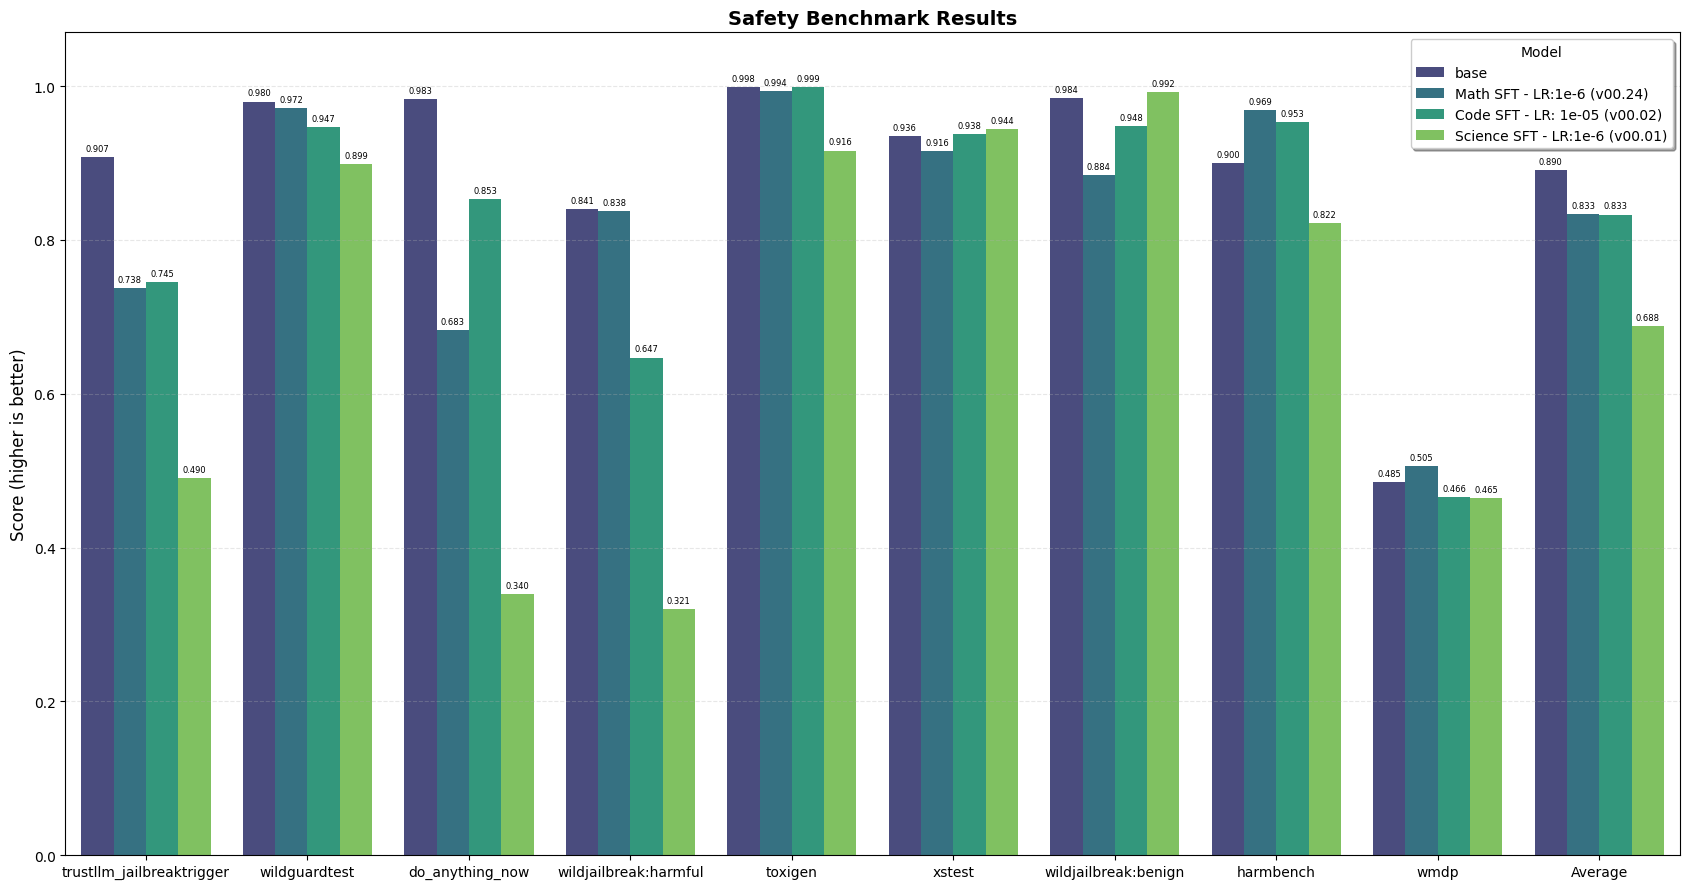

In [5]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_SFT_Math-220kv00."

safety_benchmark_configs = [
    # jailbreaks
    ('trustllm_jailbreaktrigger', 'inverted_macro_asr'),
    ('wildguardtest', 'inverted_micro_harm_lower'),
    ('do_anything_now', 'inverted_macro_asr'),
    ('wildjailbreak:harmful', 'inverted_macro_asr'),

    # implicit hate speech detection
    ('toxigen', 'safe_overall'),
    
    # overrefusal
    ('xstest', 'overall_accuracy'),
    ('wildjailbreak:benign', 'macro_asr'),

    # dangerous capabilities & chem/bio/cyber
    ('harmbench', 'inverted_micro_asr_lower'),
    ('wmdp', 'inverted_accuracy')
]
benchmarks = [benchmark[0] for benchmark in safety_benchmark_configs] + ["Average"]

### do it for base
# base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/SFT/metrics_SFT_main.json"
base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/metrics_base_main.json"
base_values = retrieve_results(results_json_path=base_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)

### this is for best low LR sft v00.24
low_lr_path = root_file_path + model + "24" + "/SFT/metrics_SFT_main.json"
low_lr_values = retrieve_results(results_json_path=low_lr_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)

## here we will have best code
best_code_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_codeforcesv00.02/SFT/metrics_SFT_main.json"
best_code_values = retrieve_results(results_json_path=best_code_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)

# here we will have best science CoT
best_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.01/SFT/metrics_SFT_main.json"
best_science_values = retrieve_results(results_json_path=best_science_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)


# now we put into a dataframe and plot
n = 1 + 3
benchmark_df_entry = benchmarks * n
value_df_entry = base_values + low_lr_values + best_code_values + best_science_values
model_df_entry = ['base'] * len(benchmarks) + ['Math SFT - LR:1e-6 (v00.24)'] * len(benchmarks) + ['Code SFT - LR: 1e-05 (v00.02)'] * len(benchmarks) + ['Science SFT - LR:1e-6 (v00.01)'] * len(benchmarks)


df = pd.DataFrame({
    'Benchmark': benchmark_df_entry,
    'Value': value_df_entry,
    'Model': model_df_entry,
})

fig, ax = plt.subplots(figsize=(17, 9))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# again we add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Safety Benchmark Results', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# trying to give room for labels
ax.set_ylim(0, 1 * 1.07)

plt.tight_layout()
plt.show()

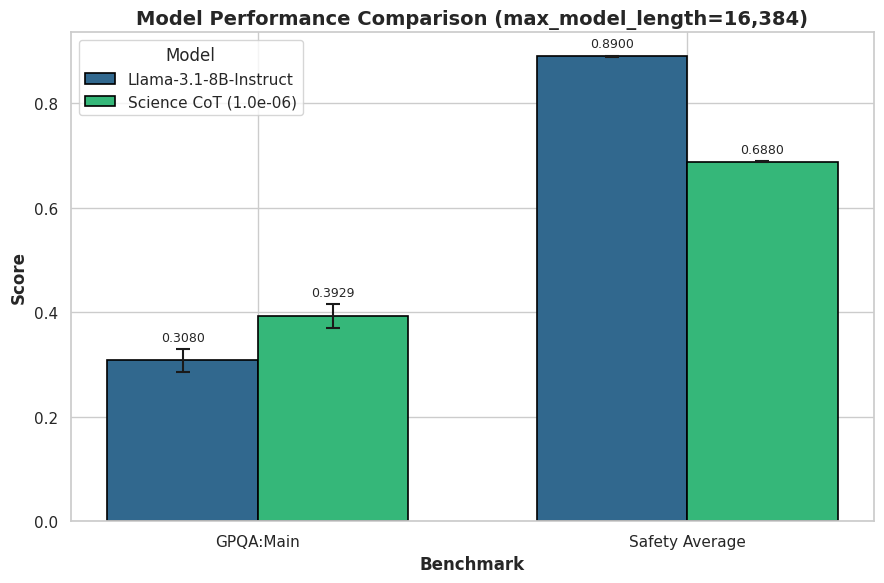

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the results
data = {
    'Version': ['Llama-3.1-8B-Instruct', 'Science CoT (1.0e-06)'] * 2,
    'Benchmark': ['GPQA:Main'] * 2 + ['Safety Average'] * 2,
    'Value': [0.308, 0.3929, 0.890, 0.688],
    'Stderr': [0.0218, 0.0231, 0.001, 0.001]
}

df = pd.DataFrame(data)

# Set up the plot style
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(9, 6))

# Create grouped bar plot
benchmarks = df['Benchmark'].unique()
models = df['Version'].unique()
x = np.arange(len(benchmarks))
width = 0.35

colors = sns.color_palette("viridis", n_colors=len(models))

for i, model in enumerate(models):
    subset = df[df['Version'] == model]
    bars = ax.bar(x + i * width, subset['Value'], width, yerr=subset['Stderr'],
                  capsize=5, color=colors[i], edgecolor='black', linewidth=1.2,
                  error_kw={'linewidth': 1.5, 'capthick': 1.5}, label=model)
    
    # Add value labels on top of bars
    for bar, val, err in zip(bars, subset['Value'], subset['Stderr']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + err + 0.01,
                f'{val:.4f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_xlabel('Benchmark', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison (max_model_length=16,384)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(benchmarks)
ax.legend(title='Model')

plt.xticks(rotation=0)
plt.tight_layout()

## Science Learning rate ablation

Ok so, what I need here is to end up with a plot where
- x axis has three groups, gpqa performance, jailbreak performance, overrefusal performance
- x axis is learning rate, 5e-7, 1e-6, 5e-6
- y axis is performance


WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect


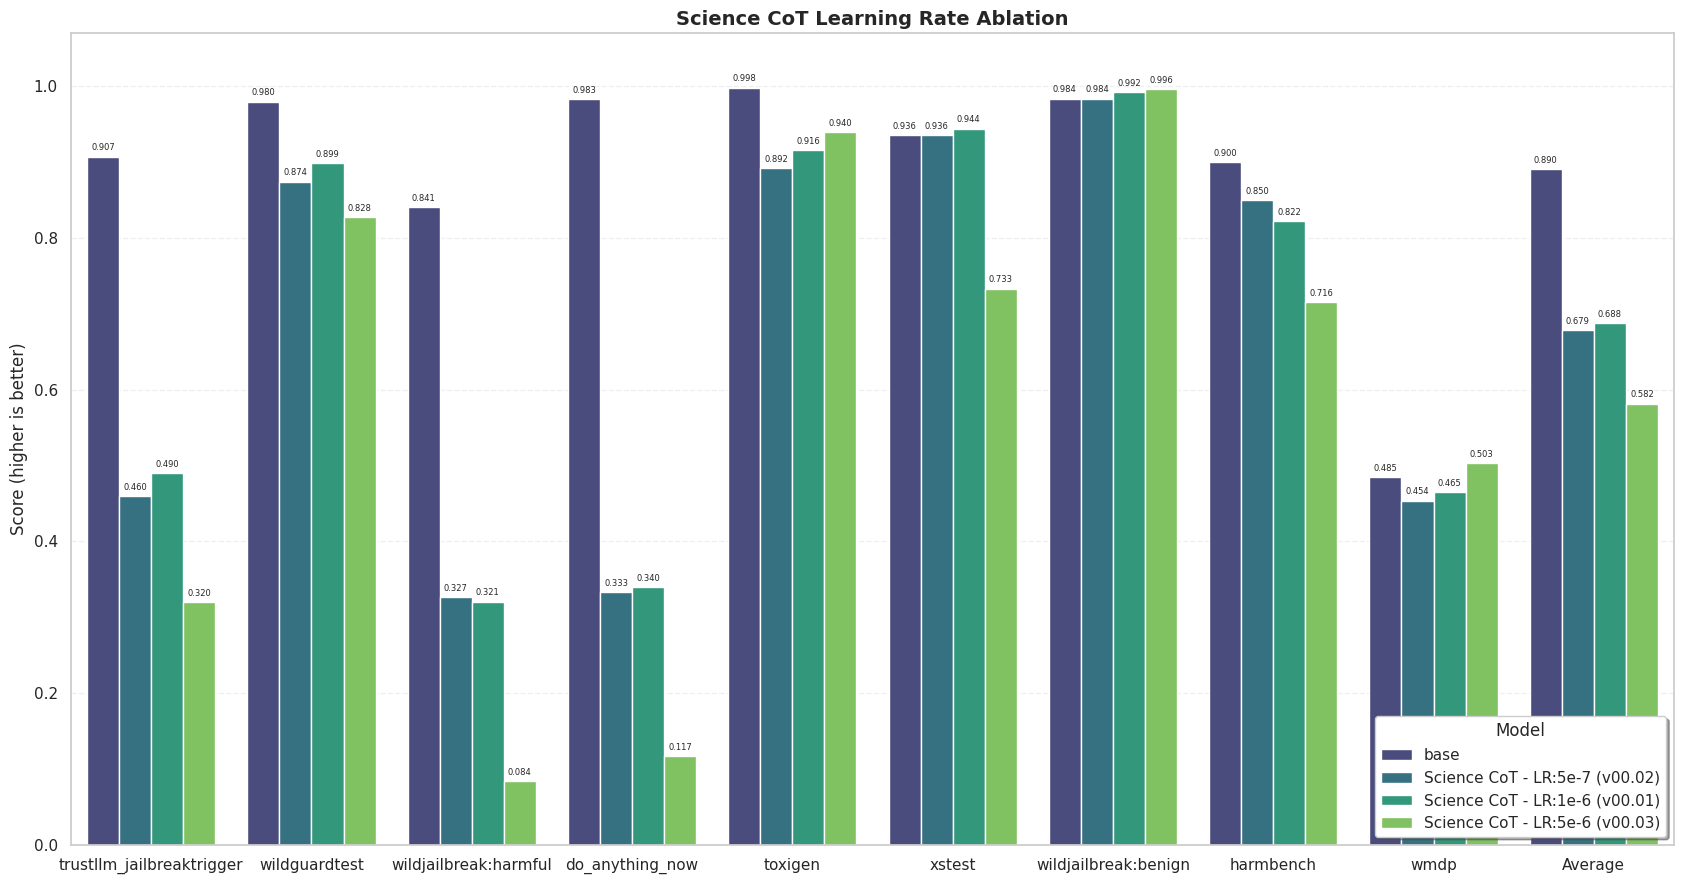

In [7]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_SFT_Math-220kv00."

safety_benchmark_configs = [
    # jailbreaks
    ('trustllm_jailbreaktrigger', 'inverted_macro_asr'),
    ('wildguardtest', 'inverted_micro_harm_lower'),
    ('wildjailbreak:harmful', 'inverted_macro_asr'),
    ('do_anything_now', 'inverted_macro_asr'),
    

    # implicit hate speech detection
    ('toxigen', 'safe_overall'),
    
    # overrefusal
    ('xstest', 'overall_accuracy'),
    ('wildjailbreak:benign', 'macro_asr'),

    # dangerous capabilities & chem/bio/cyber
    ('harmbench', 'inverted_micro_asr_lower'),
    ('wmdp', 'inverted_accuracy')
]
benchmarks = [benchmark[0] for benchmark in safety_benchmark_configs] + ["Average"]

### do it for base
# base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/SFT/metrics_SFT_main.json"
base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/metrics_base_main.json"
base_values = retrieve_results(results_json_path=base_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)

# get values for v2 science, this comes first as it is 5e-7!!!!
v2_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.02/SFT/metrics_SFT_main.json"
v2_science_values = retrieve_results(results_json_path=v2_science_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
# here i could imagine retrieving once for safety, once for overrefusal!


# get values for v1 science
v1_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.01/SFT/metrics_SFT_main.json"
v1_science_values = retrieve_results(results_json_path=v1_science_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)


# get values for v1 science
v3_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.03/SFT/metrics_SFT_main.json"
v3_science_values = retrieve_results(results_json_path=v3_science_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)



# # now we put into a dataframe and plot
n = 1 + 3
benchmark_df_entry = benchmarks * n
value_df_entry = base_values + v2_science_values + v1_science_values + v3_science_values
model_df_entry = ['base'] * len(benchmarks) + ['Science CoT - LR:5e-7 (v00.02)'] * len(benchmarks) + ['Science CoT - LR:1e-6 (v00.01)'] * len(benchmarks) + ['Science CoT - LR:5e-6 (v00.03)'] * len(benchmarks)


df = pd.DataFrame({
    'Benchmark': benchmark_df_entry,
    'Value': value_df_entry,
    'Model': model_df_entry,
})

fig, ax = plt.subplots(figsize=(17, 9))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# again we add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Science CoT Learning Rate Ablation', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True, loc='lower right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# trying to give room for labels
ax.set_ylim(0, 1 * 1.07)

plt.tight_layout()
plt.show()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

jailbreak_benchmark_configs = [
    # jailbreaks
    ('trustllm_jailbreaktrigger', 'inverted_macro_asr'),
    ('wildguardtest', 'inverted_micro_harm_lower'),
    ('wildjailbreak:harmful', 'inverted_macro_asr'),
    ('do_anything_now', 'inverted_macro_asr'),
    
]
overrefusal_benchmark_configs = [
    # overrefusal
    ('xstest', 'overall_accuracy'),
    ('wildjailbreak:benign', 'macro_asr'),
    
]

# jailbreak and overrefusal averages for base
base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/metrics_base_main.json"
jailbreak_base_values = retrieve_results(results_json_path=base_path, benchmark_configs=jailbreak_benchmark_configs, compute_mean=True)
print(base_values)
jailbreak_base_values_avg = jailbreak_base_values[-1]

overrefusal_base_values = retrieve_results(results_json_path=base_path, benchmark_configs=overrefusal_benchmark_configs, compute_mean=True)
overrefusal_base_values_avg = overrefusal_base_values[-1]

# jailbreak and overrefusal averages for 5e-7
v2_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.02/SFT/metrics_SFT_main.json"
jailbreak_v2_values = retrieve_results(results_json_path=v2_science_path, benchmark_configs=jailbreak_benchmark_configs, compute_mean=True)
jailbreak_v2_values_avg = jailbreak_v2_values[-1]

overrefusal_v2_values = retrieve_results(results_json_path=v2_science_path, benchmark_configs=overrefusal_benchmark_configs, compute_mean=True)
overrefusal_v2_values_avg = overrefusal_v2_values[-1]

# JB and OR averages for 1e-6
v1_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.01/SFT/metrics_SFT_main.json"
jailbreak_v1_values = retrieve_results(results_json_path=v1_science_path, benchmark_configs=jailbreak_benchmark_configs, compute_mean=True)
jailbreak_v1_values_avg = jailbreak_v1_values[-1]

overrefusal_v1_values = retrieve_results(results_json_path=v1_science_path, benchmark_configs=overrefusal_benchmark_configs, compute_mean=True)
overrefusal_v1_values_avg = overrefusal_v1_values[-1]

# JB and OR averages for 5e-6
v3_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.03/SFT/metrics_SFT_main.json"
jailbreak_v3_values = retrieve_results(results_json_path=v3_science_path, benchmark_configs=jailbreak_benchmark_configs, compute_mean=True)
jailbreak_v3_values_avg = jailbreak_v3_values[-1]

overrefusal_v3_values = retrieve_results(results_json_path=v3_science_path, benchmark_configs=overrefusal_benchmark_configs, compute_mean=True)
overrefusal_v3_values_avg = overrefusal_v3_values[-1]



print(jailbreak_base_values_avg, overrefusal_base_values_avg)
print(jailbreak_v2_values_avg, overrefusal_v2_values_avg)
print(jailbreak_v1_values_avg, overrefusal_v1_values_avg)
print(jailbreak_v3_values_avg, overrefusal_v3_values_avg)

[0.9075, 0.9799732977303071, 0.8405, 0.9833333333333333, 0.9983571428571428, 0.9355555555555556, 0.984, 0.9, 0.4850136239782016, 0.8904703281616155]
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
0.9278266577659101 0.9597777777777778
0.4987081664441477 0.9597777777777778
0.5122578437917222 0.9682222222222222
0.33698425678682686 0.8646666666666667


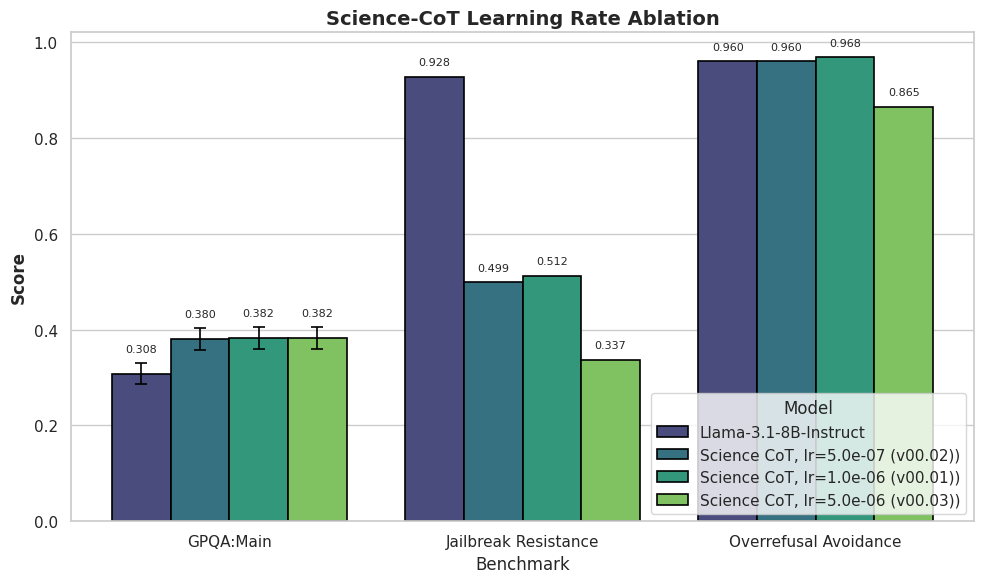

In [9]:

results = {
    'Llama-3.1-8B-Instruct':             {'GPQA:Main': (0.308,  0.0218), 'Jailbreak Resistance': (jailbreak_base_values_avg, 0.000), 'Overrefusal Avoidance': (overrefusal_base_values_avg, 0.000)},
    'Science CoT, lr=5.0e-07 (v00.02))': {'GPQA:Main': (0.3795, 0.023),  'Jailbreak Resistance': (jailbreak_v2_values_avg, 0.000), 'Overrefusal Avoidance': (overrefusal_v2_values_avg, 0.000)},
    'Science CoT, lr=1.0e-06 (v00.01))': {'GPQA:Main': (0.3817, 0.023),  'Jailbreak Resistance': (jailbreak_v1_values_avg, 0.000), 'Overrefusal Avoidance': (overrefusal_v1_values_avg, 0.000)},
    'Science CoT, lr=5.0e-06 (v00.03))': {'GPQA:Main': (0.3817, 0.023),  'Jailbreak Resistance': (jailbreak_v3_values_avg, 0.000), 'Overrefusal Avoidance': (overrefusal_v3_values_avg, 0.000)},
}


# === BUILD DATAFRAME AUTOMATICALLY ===
rows = []
for model, benchmarks in results.items():
    for bench, (val, err) in benchmarks.items():
        rows.append({'Model': model, 'Benchmark': bench, 'Value': val, 'Stderr': err})
df = pd.DataFrame(rows)

# === PLOT ===
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

barplot = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', 
                      palette='viridis', edgecolor='black', linewidth=1.2, ax=ax)

# Convert to lists to avoid PyArrow indexing issues
benchmarks = df['Benchmark'].unique().tolist()
models = df['Model'].unique().tolist()
n_models = len(models)

# Only iterate over the first n_models containers (the actual bar groups)
for model_idx, container in enumerate(ax.containers[:n_models]):
    model = models[model_idx]
    
    for bench_idx, bar in enumerate(container):
        bench = benchmarks[bench_idx]
        row = df[(df['Model'] == model) & (df['Benchmark'] == bench)].iloc[0]
        
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        err = row['Stderr']
        
        # Error bar
        if err > 0:
            ax.errorbar(x, y, yerr=err, color='black', capsize=4, capthick=1.2, linewidth=1.2)
        
        # Value label
        ax.text(x, y + err + 0.02, f'{row["Value"]:.3f}', ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Science-CoT Learning Rate Ablation', fontsize=14, fontweight='bold')
ax.legend(title='Model', 
        #   bbox_to_anchor=(1.02, 1), 
          loc='lower right')
ax.set_ylim(0, 1.02)
plt.tight_layout()

## progress on Science CoT across training on gpqa

Plot saved!


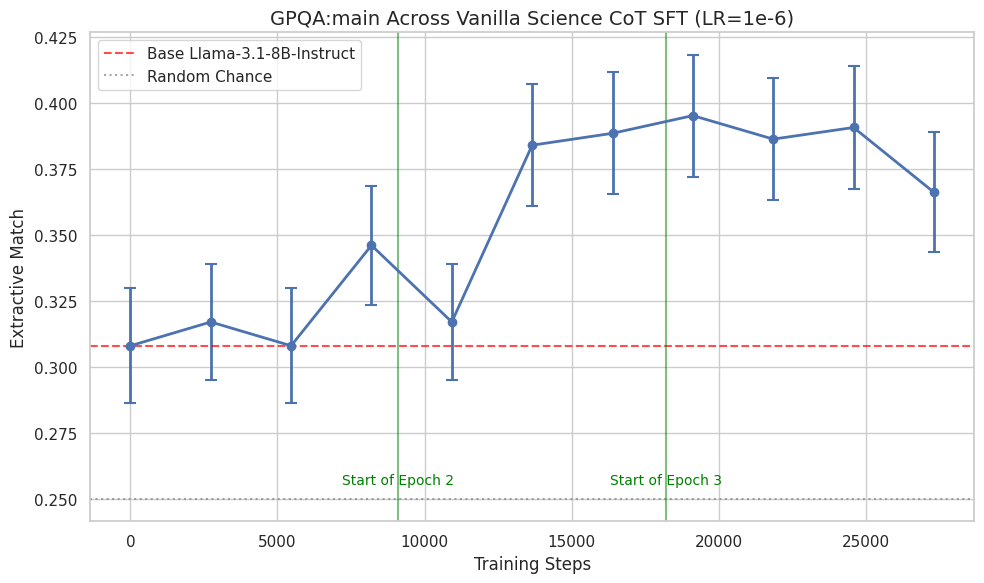

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'step': [0, 2732, 5464, 8196, 10928, 13660, 16392, 19124, 21856, 24588, 27318,],
    'value': [0.308, 0.317, 0.308, 0.346, 0.317, 0.3839, 0.3884, 0.3951, 0.3862, 0.3906, 0.3661,],
    'stderr': [0.0218, 0.022, 0.0218, 0.0225, 0.022, 0.023, 0.0231, 0.0231, 0.023, 0.0231, 0.0228, ]
}

df = pd.DataFrame(data)
# Convert step to numeric for plotting (final -> last step + interval)
df['step_num'] = [0, 2732, 5464, 8196, 10928, 13660, 16392, 19124, 21856, 24588, 27318,]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Line plot with error bars
plt.errorbar(df['step_num'], df['value'], yerr=df['stderr'], marker='o', capsize=4, capthick=1.5, linewidth=2, markersize=6)

# Add baseline reference
plt.axhline(y=0.308, color='red', linestyle='--', alpha=0.7, label='Base Llama-3.1-8B-Instruct')

# Add random chance line
plt.axhline(y=0.25, color='gray', linestyle=':', alpha=0.7, label='Random Chance')

st_epoch_1 = 9105
st_epoch_2 = 18211

# Add epoch dividers (assuming ~10k steps per epoch)
plt.axvline(x=st_epoch_1, color='green', linestyle='-', alpha=0.5, linewidth=1.5)
plt.axvline(x=st_epoch_2, color='green', linestyle='-', alpha=0.5, linewidth=1.5)

# Label the epoch dividers
plt.text(st_epoch_1, 0.26, 'Start of Epoch 2', ha='center', va='top', fontsize=10, color='green')
plt.text(st_epoch_2, 0.26, 'Start of Epoch 3', ha='center', va='top', fontsize=10, color='green')

plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Extractive Match', fontsize=12)
plt.title('GPQA:main Across Vanilla Science CoT SFT (LR=1e-6)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('/tmp/sft_progress.png', dpi=150)
print("Plot saved!")

## All MoT safety

WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect
WildTeaming paper (https://arxiv.org/pdf/2406.18510v1) mentions refusal to answer (RTA) where lower is better. but the name 'macro_asr' seems incorrect


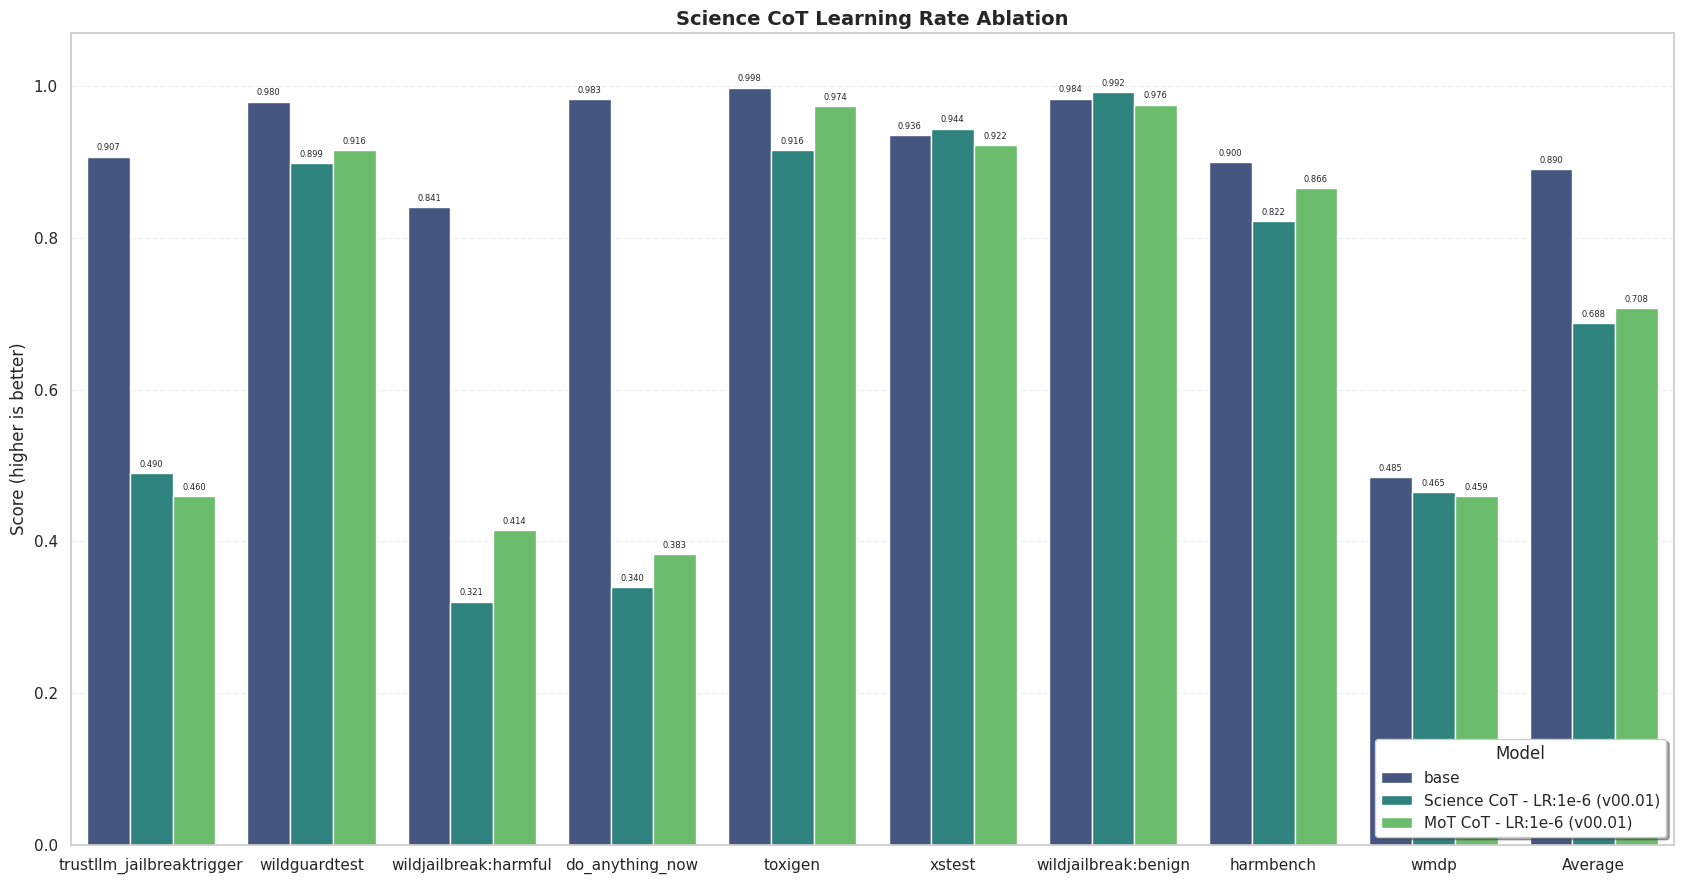

In [16]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

root_file_path = "../safety-eval/generation_results/"
model = "Neelectric/Llama-3.1-8B-Instruct_SFT_Math-220kv00."

safety_benchmark_configs = [
    # jailbreaks
    ('trustllm_jailbreaktrigger', 'inverted_macro_asr'),
    ('wildguardtest', 'inverted_micro_harm_lower'),
    ('wildjailbreak:harmful', 'inverted_macro_asr'),
    ('do_anything_now', 'inverted_macro_asr'),
    
    # implicit hate speech detection
    ('toxigen', 'safe_overall'),
    
    # overrefusal
    ('xstest', 'overall_accuracy'),
    ('wildjailbreak:benign', 'macro_asr'),

    # dangerous capabilities & chem/bio/cyber
    ('harmbench', 'inverted_micro_asr_lower'),
    ('wmdp', 'inverted_accuracy')
]
benchmarks = [benchmark[0] for benchmark in safety_benchmark_configs] + ["Average"]

### do it for base
# base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/SFT/metrics_SFT_main.json"
base_path = root_file_path + "meta-llama/Llama-3.1-8B-Instruct" + "/base/metrics_base_main.json"
base_values = retrieve_results(results_json_path=base_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)


# get values for v1 science
v1_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_sciencev00.01/SFT/metrics_SFT_main.json"
v1_science_values = retrieve_results(results_json_path=v1_science_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)


# get values for v1 science
v3_science_path = "../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_MoTv00.01/SFT/metrics_SFT_main.json"
v3_science_values = retrieve_results(results_json_path=v3_science_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)





# # now we put into a dataframe and plot
n = 1 + 2
benchmark_df_entry = benchmarks * n
value_df_entry = base_values + v1_science_values + v3_science_values 
model_df_entry = ['base'] * len(benchmarks) + ['Science CoT - LR:1e-6 (v00.01)'] * len(benchmarks) + ['MoT CoT - LR:1e-6 (v00.01)'] * len(benchmarks)

df = pd.DataFrame({
    'Benchmark': benchmark_df_entry,
    'Value': value_df_entry,
    'Model': model_df_entry,
})

fig, ax = plt.subplots(figsize=(17, 9))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# again we add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Science CoT Learning Rate Ablation', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True, loc='lower right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# trying to give room for labels
ax.set_ylim(0, 1 * 1.07)

plt.tight_layout()
plt.show()

In [15]:
!ls ../safety-eval/generation_results/Neelectric/Llama-3.1-8B-Instruct_SFT_MoTv00.01/SFT

metrics_SFT_main.json
